# Preprocesamiento y revisión de variables

## Funnel de Modelamiento

### Importación de Librerías iniciales

In [389]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Usamos una semilla a lo largo de todo el notebook para los procesos aleatorios

In [390]:
seed = 2021

### 1. Lectura de base

In [391]:
data_creditos = pd.read_csv('Data1/loan_prediction.csv', delimiter=',')

`head` `shape` `type`

In [392]:
data_creditos.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [393]:
data_creditos.shape

(614, 13)

Definimos 2 columnas relevantes, el id y el target, que en nuestro caso son las siguientes variables:

In [394]:
id_columns = 'Loan_ID'
target = 'Loan_Status'

La variable target es binaria de tipo texto, mejor lo cambiamos a numérico:

In [395]:
data_creditos[target].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [396]:
data_creditos[target] = data_creditos[target].map({'Y': 0, 'N': 1})

In [397]:
data_creditos[target].value_counts()

0    422
1    192
Name: Loan_Status, dtype: int64

ValueError: The number of FixedLocator locations (1), usually from a call to set_ticks, does not match the number of labels (2).

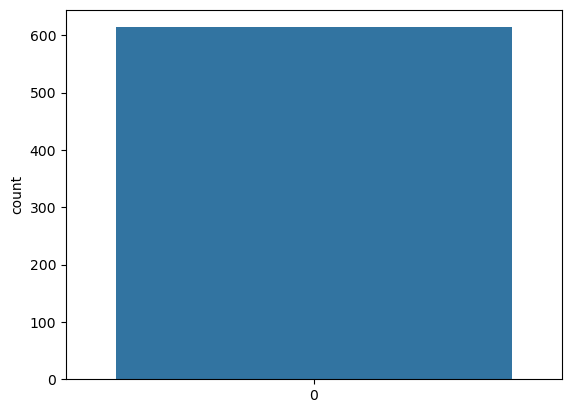

In [398]:
g = sns.countplot(data_creditos[target])
g.set_xticklabels(['Y','N'])
plt.show()

In [399]:
data_creditos.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


Veamos algunas características de nuestra variable target:

In [400]:
data_creditos[target].value_counts(normalize = True)

0    0.687296
1    0.312704
Name: Loan_Status, dtype: float64

El id de la tabla no nos va a servir para el entrenamiento de datos, por lo que lo vamos a eliminar el id de los clientes antes de empezar con el tratamiento de datos:

In [401]:
data_creditos = data_creditos.drop(id_columns, axis=1)

In [402]:
data_creditos.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1


## 2.División en conjuntos de entrenamiento y prueba

En esta etapa realizaremos la división bases de entrenamiento (train) y prueba (test).

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [403]:
X = data_creditos.drop(target, axis=1)
y = data_creditos[target]

In [404]:
X.head(2)


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural


In [405]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Loan_Status, dtype: int64

In [406]:
X.shape

(614, 11)

In [407]:
y.shape

(614,)

In [408]:
# función para dividir la base
from sklearn.model_selection import train_test_split

In [409]:
# usaremos la división train/test en 80/20. Otro ratio recomendable es 70/30
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 3)

In [410]:
X_train.head()


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban
510,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
584,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural


In [411]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
543,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban
488,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban
167,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban


In [412]:
X_train.shape, X_test.shape

((491, 11), (123, 11))

In [413]:
y_train.shape, y_test.shape

((491,), (123,))

In [414]:
# validación de los promedios de la variable target
y.mean(), y_train.mean(), y_test.mean()

(0.3127035830618892, 0.3136456211812627, 0.3089430894308943)

In [415]:
y_train.value_counts()

0    337
1    154
Name: Loan_Status, dtype: int64

In [416]:
y_test.value_counts()


0    85
1    38
Name: Loan_Status, dtype: int64

### 3.Análisis exploratorio

Revisemos las columnas del conjunto de datos:

In [417]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
502,Male,Yes,2,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban
510,Male,No,0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural
22,Male,Yes,0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
584,Male,Yes,1,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural


In [418]:
X_train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [419]:
X_train.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [420]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 491 entries, 502 to 550
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             481 non-null    object 
 1   Married            489 non-null    object 
 2   Dependents         479 non-null    object 
 3   Education          491 non-null    object 
 4   Self_Employed      468 non-null    object 
 5   ApplicantIncome    491 non-null    int64  
 6   CoapplicantIncome  491 non-null    float64
 7   LoanAmount         473 non-null    float64
 8   Loan_Amount_Term   481 non-null    float64
 9   Credit_History     451 non-null    float64
 10  Property_Area      491 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 46.0+ KB


Veamos los principales estadísticos:

In [421]:
X_train.describe() #sólo para variables numéricas 

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,473.000000,481.000000,451.000000
mean,5497.806517,1529.347861,144.532770,341.413721,0.844789
std,6587.209015,2512.306332,84.078224,64.233407,0.362507
min,645.000000,0.000000,9.000000,12.000000,0.000000
25%,2816.000000,0.000000,100.000000,360.000000,1.000000
50%,3762.000000,1167.000000,128.000000,360.000000,1.000000
75%,5790.000000,2241.000000,167.000000,360.000000,1.000000
max,81000.000000,33837.000000,700.000000,480.000000,1.000000


In [422]:
X_train.describe(include = 'object') #para datos categoricos

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
count,481,489,479,491,468,491
unique,2,2,4,2,2,3
top,Male,Yes,0,Graduate,No,Semiurban
freq,394,321,277,378,409,186


Si observas variables con muchas categorías (cercana a la cantidad de registros) o 1 sola categoria, descartalas.

In [423]:
X_train['Married'].value_counts()

Yes    321
No     168
Name: Married, dtype: int64

In [424]:
X_train['Married'].value_counts(dropna = False)

Yes    321
No     168
NaN      2
Name: Married, dtype: int64

In [425]:
X_train['Self_Employed'].value_counts(dropna = False)


No     409
Yes     59
NaN     23
Name: Self_Employed, dtype: int64

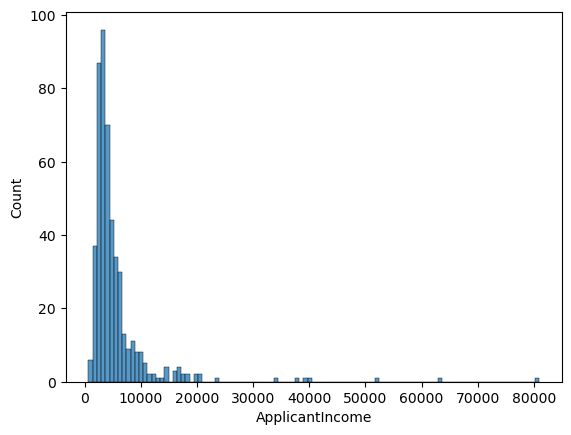

In [426]:
sns.histplot(data= X_train, x = 'ApplicantIncome')
plt.show()

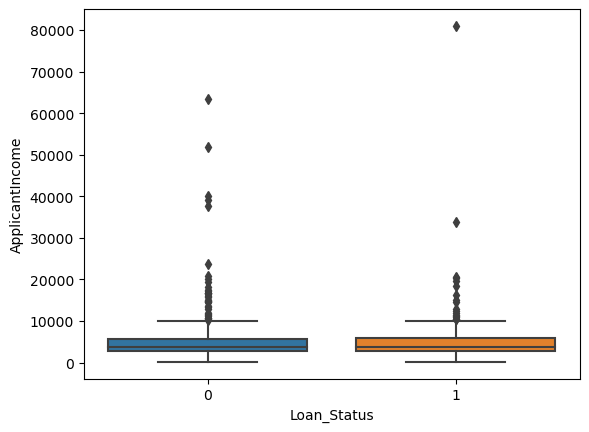

In [427]:
sns.boxplot(data = data_creditos, y = 'ApplicantIncome', x = target)
plt.show()

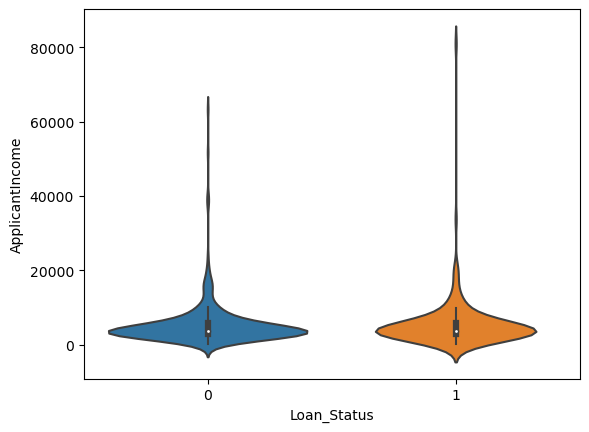

In [428]:
sns.violinplot(x = target, y = 'ApplicantIncome', data = data_creditos)
plt.show()

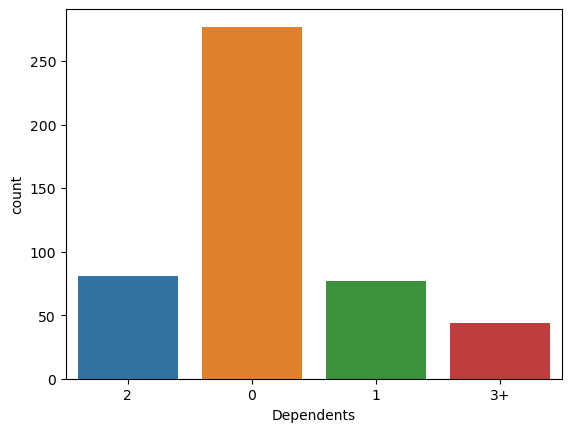

In [429]:
sns.countplot(data = X_train, x='Dependents')
plt.show()

In [430]:
X_train.query("Dependents == '3+'").head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
155,Male,Yes,3+,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
259,Male,Yes,3+,Not Graduate,No,4931,0.0,128.0,360.0,NaN,Semiurban
390,Male,No,3+,Graduate,No,9167,0.0,185.0,360.0,1.0,Rural
267,Male,Yes,3+,Graduate,No,4333,1811.0,160.0,360.0,0.0,Urban


## 4.Transformación de variables

In [431]:
X_train['Dependents'].value_counts()

0     277
2      81
1      77
3+     44
Name: Dependents, dtype: int64

In [432]:
mapping = {'0':0,'1':1,'2':2,'3+': 3}   #labeling
X_train['Dependents']= X_train['Dependents'].map(mapping)

In [433]:
X_train['Dependents'].value_counts(dropna = False)

0.0    277
2.0     81
1.0     77
3.0     44
NaN     12
Name: Dependents, dtype: int64

In [434]:
X_train.query("ApplicantIncome > 20000 and Dependents == 3").head()  

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
155,Male,Yes,3.0,Graduate,No,39999,0.0,600.0,180.0,0.0,Semiurban
171,NaN,Yes,3.0,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban
409,Male,Yes,3.0,Graduate,No,81000,0.0,360.0,360.0,0.0,Rural
126,NaN,Yes,3.0,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural


## 5. Tratamiento de valores nulos

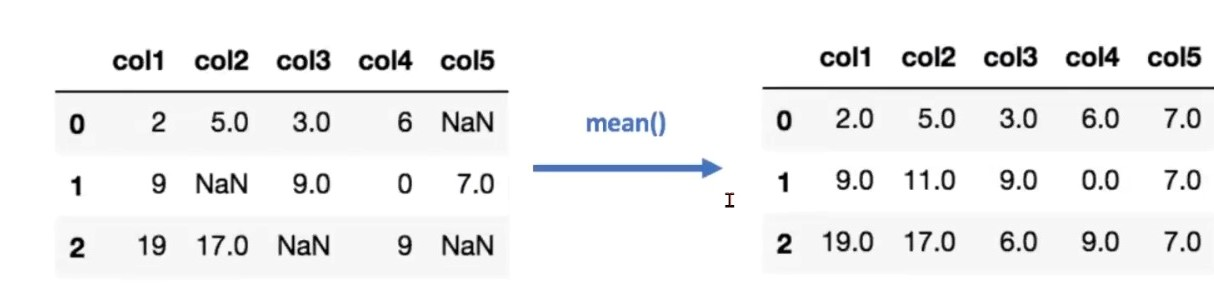

Cantidad de valores nulos por columna

Missigno: https://github.com/ResidentMario/missingno

In [435]:
X_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
502,Male,Yes,2.0,Graduate,No,4865,5624.0,208.0,360.0,1.0,Semiurban
510,Male,No,0.0,Not Graduate,No,3598,1287.0,100.0,360.0,1.0,Rural
22,Male,Yes,0.0,Not Graduate,No,2600,1911.0,116.0,360.0,0.0,Semiurban
355,Female,No,NaN,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban
584,Male,Yes,1.0,Graduate,No,2787,1917.0,146.0,360.0,0.0,Rural


In [436]:
# instalar missingno
!pip install missingno

Defaulting to user installation because normal site-packages is not writeable


In [437]:
import missingno as msno

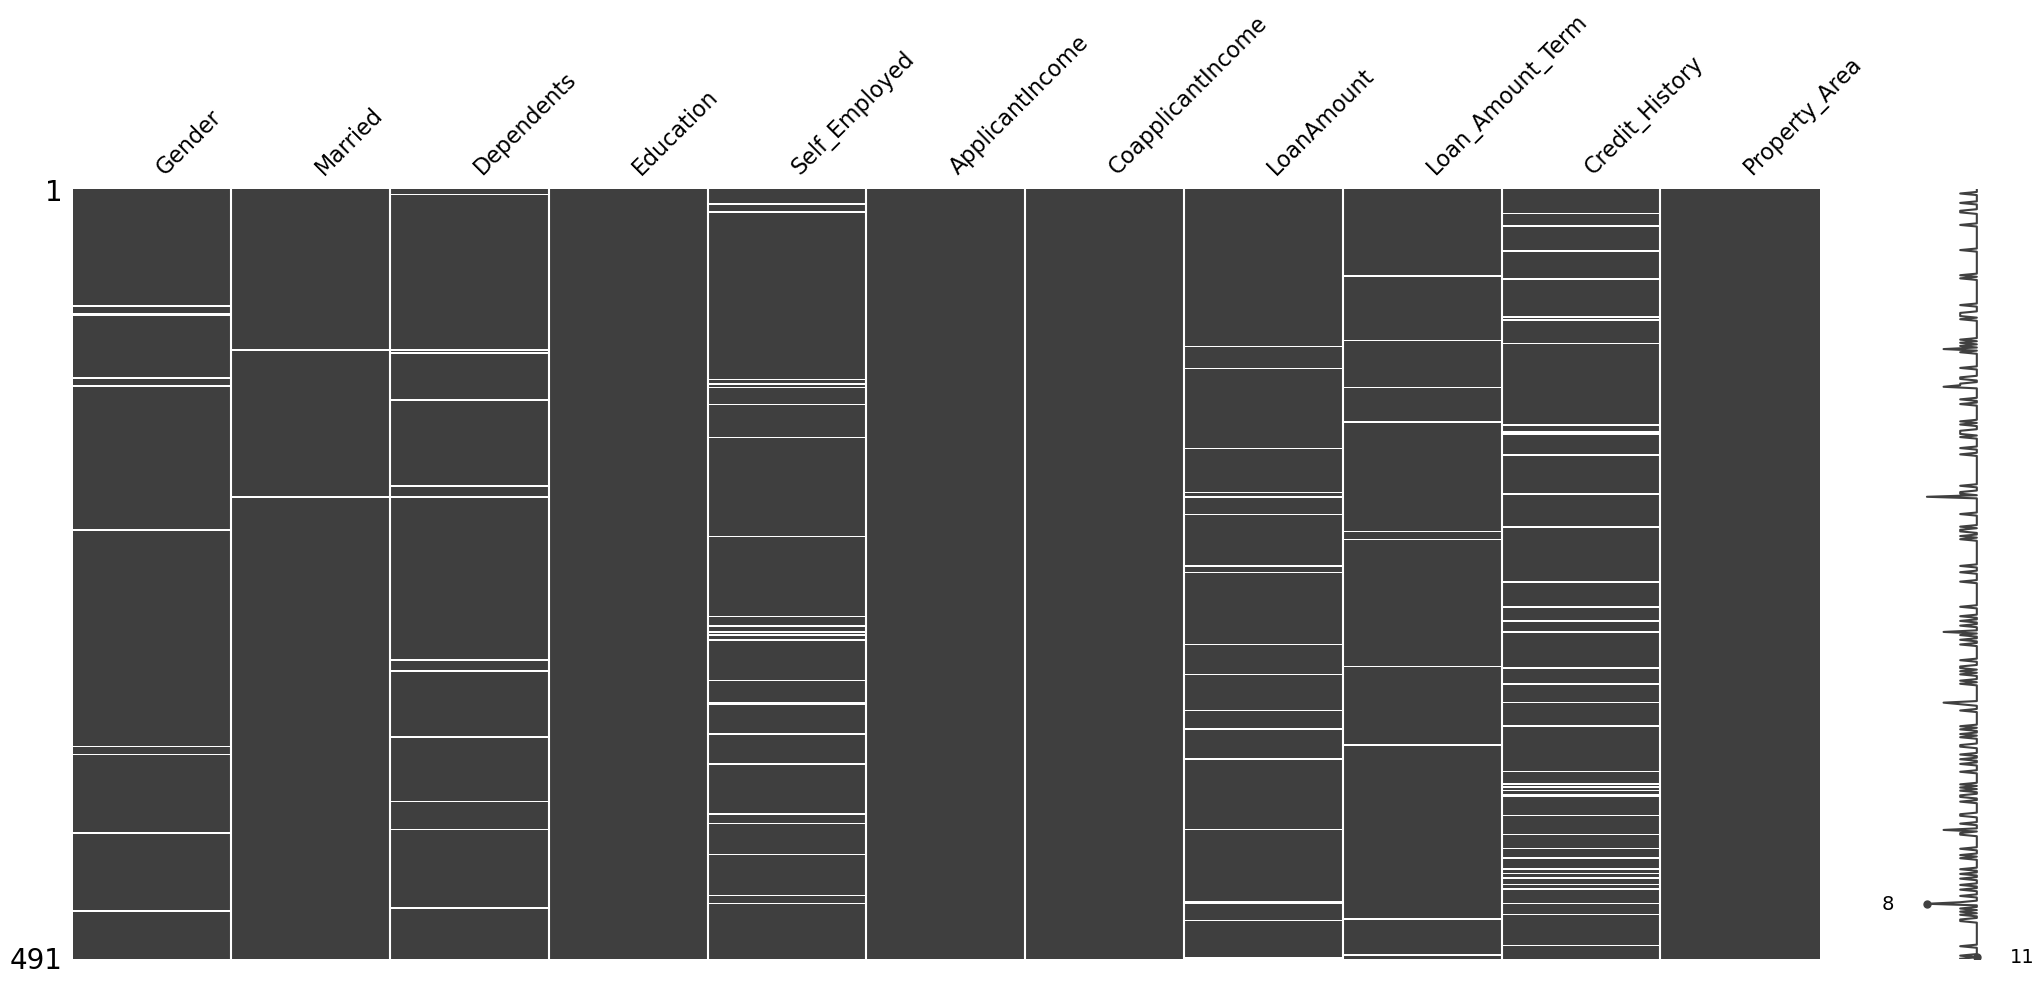

In [438]:
msno.matrix(X_train)
plt.show()

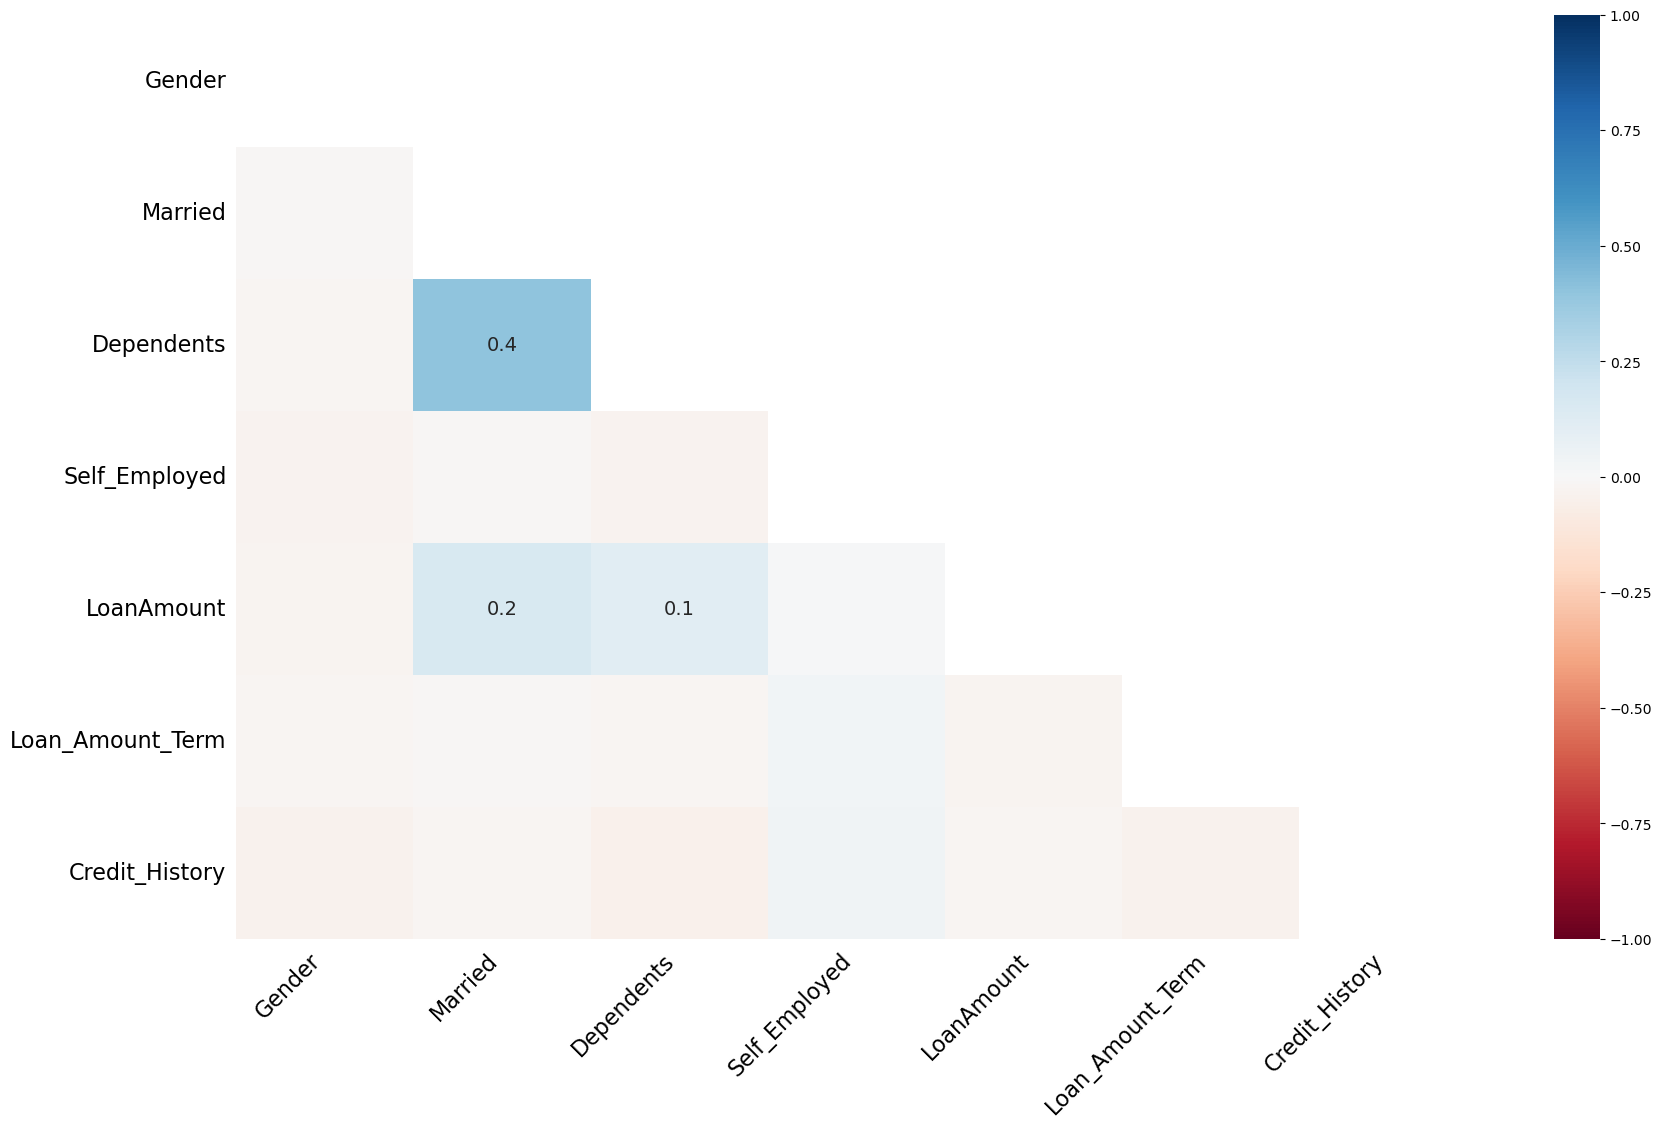

In [439]:
msno.heatmap(X_train)
plt.show()

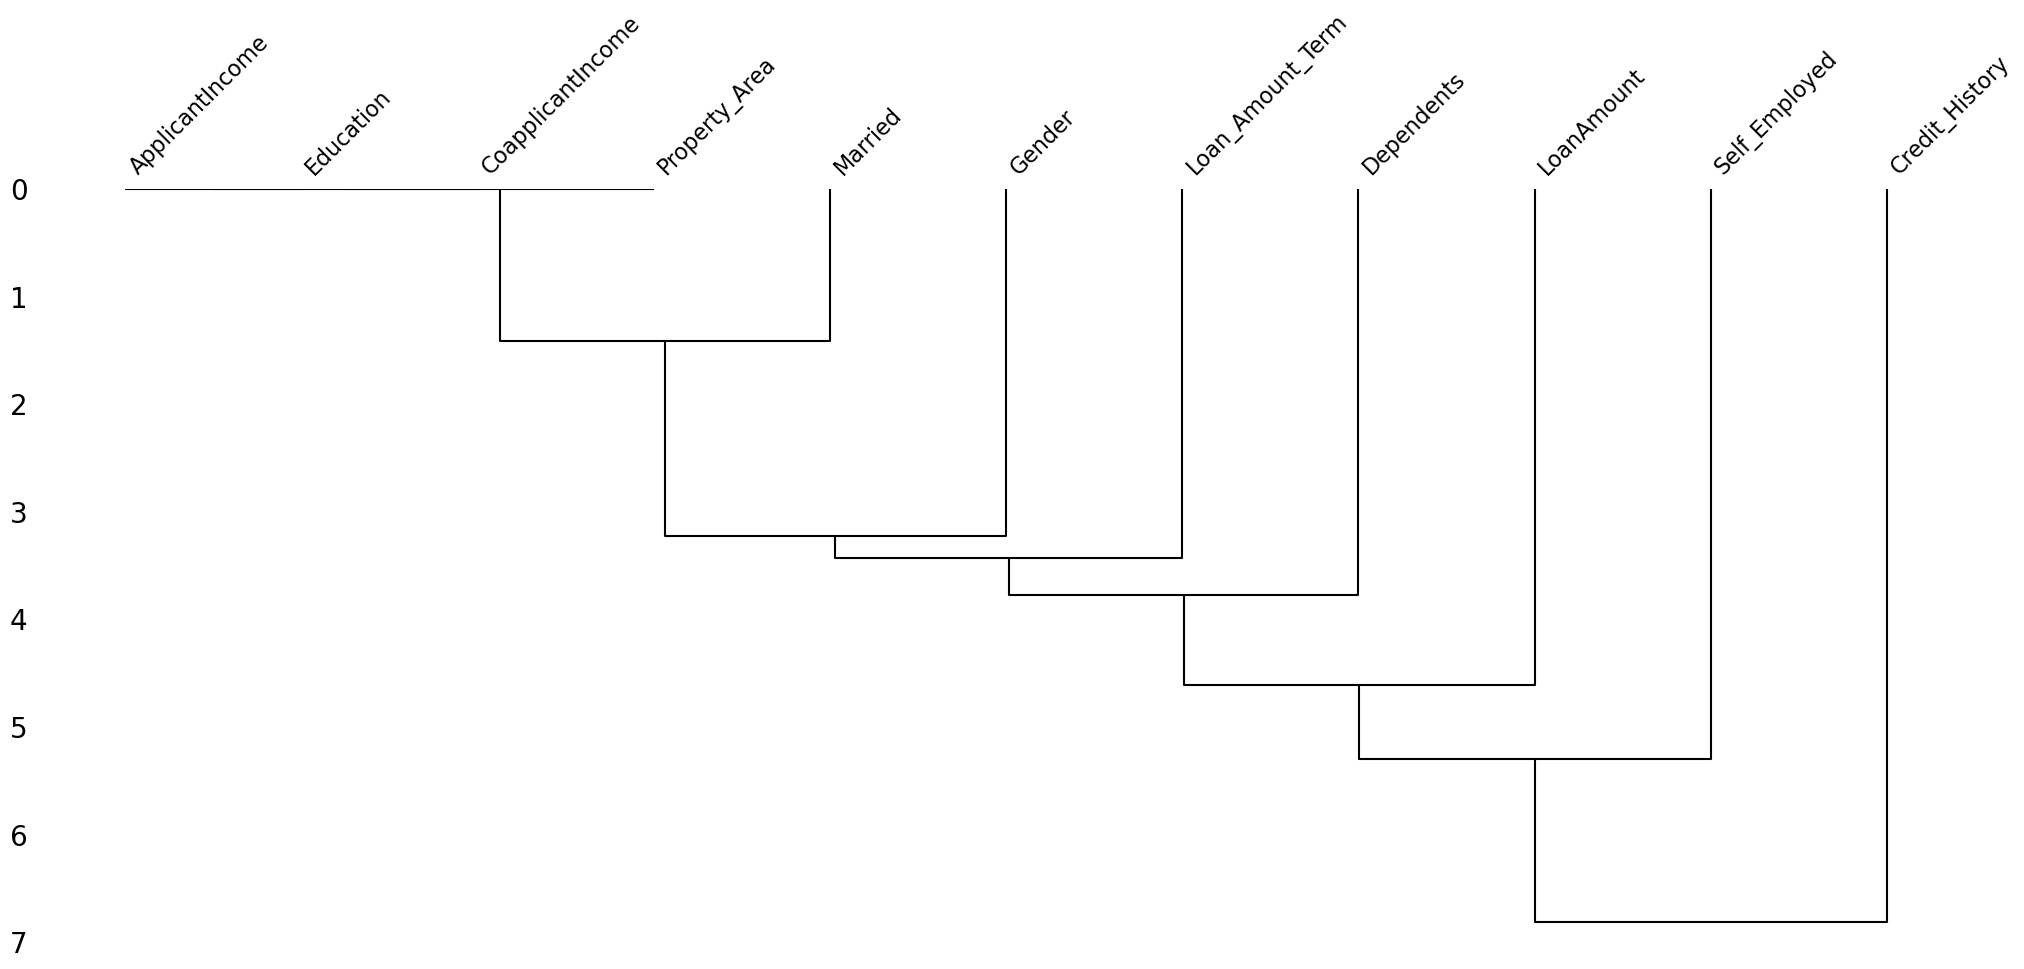

In [440]:
msno.dendrogram(X_train)
plt.show()

In [441]:
X_train.isnull().sum()

Gender               10
Married               2
Dependents           12
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     10
Credit_History       40
Property_Area         0
dtype: int64

El método de imputación depende de la naturaleza de la variable. Separamos las variables categóricas de las numéricas

In [442]:
X_train_cat = X_train.select_dtypes('object')
X_train_num = X_train.select_dtypes('number')

In [443]:
X_train_cat.head()

,Gender,Married,Education,Self_Employed,Property_Area
502,Male,Yes,Graduate,No,Semiurban
510,Male,No,Not Graduate,No,Rural
22,Male,Yes,Not Graduate,No,Semiurban
355,Female,No,Graduate,No,Urban
584,Male,Yes,Graduate,No,Rural


In [444]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
502,2.0,4865,5624.0,208.0,360.0,1.0
510,0.0,3598,1287.0,100.0,360.0,1.0
22,0.0,2600,1911.0,116.0,360.0,0.0
355,NaN,3813,0.0,116.0,180.0,1.0
584,1.0,2787,1917.0,146.0,360.0,0.0


Simple imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html

#### Imputación de numéricas

In [445]:
X_train['Dependents'].mean()

0.7745302713987474

In [446]:
X_train['Dependents'].median()

0.0

In [447]:
from sklearn.impute import SimpleImputer

In [448]:
X_train_num.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
502,2.0,4865,5624.0,208.0,360.0,1.0
510,0.0,3598,1287.0,100.0,360.0,1.0
22,0.0,2600,1911.0,116.0,360.0,0.0
355,NaN,3813,0.0,116.0,180.0,1.0
584,1.0,2787,1917.0,146.0,360.0,0.0


In [449]:
imputer_num = SimpleImputer(strategy = 'median')

In [450]:
imputer_num.fit(X_train_num)

SimpleImputer(strategy='median')

`IMPUTER.statistics_`

In [451]:
imputer_num.statistics_

array([0.000e+00, 3.762e+03, 1.167e+03, 1.280e+02, 3.600e+02, 1.000e+00])

In [452]:
imputer_num.transform(X_train_num)

array([[2.000e+00, 4.865e+03, 5.624e+03, 2.080e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.598e+03, 1.287e+03, 1.000e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 2.600e+03, 1.911e+03, 1.160e+02, 3.600e+02, 0.000e+00],
       ...,
       [0.000e+00, 3.572e+03, 4.114e+03, 1.520e+02, 3.600e+02, 0.000e+00],
       [1.000e+00, 1.075e+04, 0.000e+00, 3.120e+02, 3.600e+02, 1.000e+00],
       [2.000e+00, 6.633e+03, 0.000e+00, 1.280e+02, 3.600e+02, 0.000e+00]])

In [453]:
X_train_num_imputed = pd.DataFrame(data = imputer_num.transform(X_train_num), columns = X_train_num.columns)

In [454]:
X_train_num.head(20)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
502,2.0,4865,5624.0,208.0,360.0,1.0
510,0.0,3598,1287.0,100.0,360.0,1.0
22,0.0,2600,1911.0,116.0,360.0,0.0
355,NaN,3813,0.0,116.0,180.0,1.0
584,1.0,2787,1917.0,146.0,360.0,0.0
595,0.0,3833,0.0,110.0,360.0,1.0
563,0.0,5800,0.0,132.0,360.0,1.0
292,2.0,3153,1560.0,134.0,360.0,1.0
603,0.0,3676,4301.0,172.0,360.0,1.0
374,0.0,2764,1459.0,110.0,360.0,1.0


In [455]:
X_train_num_imputed.head(20)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2.0,4865.0,5624.0,208.0,360.0,1.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0
3,0.0,3813.0,0.0,116.0,180.0,1.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0
5,0.0,3833.0,0.0,110.0,360.0,1.0
6,0.0,5800.0,0.0,132.0,360.0,1.0
7,2.0,3153.0,1560.0,134.0,360.0,1.0
8,0.0,3676.0,4301.0,172.0,360.0,1.0
9,0.0,2764.0,1459.0,110.0,360.0,1.0


In [456]:
X_train_num_imputed.head(20)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2.0,4865.0,5624.0,208.0,360.0,1.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0
3,0.0,3813.0,0.0,116.0,180.0,1.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0
5,0.0,3833.0,0.0,110.0,360.0,1.0
6,0.0,5800.0,0.0,132.0,360.0,1.0
7,2.0,3153.0,1560.0,134.0,360.0,1.0
8,0.0,3676.0,4301.0,172.0,360.0,1.0
9,0.0,2764.0,1459.0,110.0,360.0,1.0


In [457]:
X_train_num.isnull().sum()

Dependents           12
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           18
Loan_Amount_Term     10
Credit_History       40
dtype: int64

In [458]:
X_train_num_imputed.isnull().sum()

Dependents           0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

### Imputación de categóricas

In [459]:
imputer_cat = SimpleImputer(strategy = 'most_frequent')
imputer_cat.fit(X_train_cat)
X_train_cat_imputed = pd.DataFrame(imputer_cat.transform(X_train_cat), columns = X_train_cat.columns)

X_train_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Graduate,No,Semiurban
1,Male,No,Not Graduate,No,Rural
2,Male,Yes,Not Graduate,No,Semiurban
3,Female,No,Graduate,No,Urban
4,Male,Yes,Graduate,No,Rural


In [460]:
X_train_cat.isnull().sum()

Gender           10
Married           2
Education         0
Self_Employed    23
Property_Area     0
dtype: int64

In [461]:
X_train_cat_imputed.isnull().sum()

Gender           0
Married          0
Education        0
Self_Employed    0
Property_Area    0
dtype: int64

Ya no tenemos valores nulos!!

#### Utilizar el módulo sklearn.imputed para llenar valores nulos (KNNImputer)

In [462]:
from sklearn.impute import KNNImputer
knn = KNNImputer(n_neighbors=2) # con 2 vecinos

In [463]:
# TODO: imputar las variables numéricas con KNN Imputer - interpretar los resultados

knn.fit_transform(X_train_num)

array([[2.000e+00, 4.865e+03, 5.624e+03, 2.080e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 3.598e+03, 1.287e+03, 1.000e+02, 3.600e+02, 1.000e+00],
       [0.000e+00, 2.600e+03, 1.911e+03, 1.160e+02, 3.600e+02, 0.000e+00],
       ...,
       [0.000e+00, 3.572e+03, 4.114e+03, 1.520e+02, 2.700e+02, 0.000e+00],
       [1.000e+00, 1.075e+04, 0.000e+00, 3.120e+02, 3.600e+02, 1.000e+00],
       [2.000e+00, 6.633e+03, 0.000e+00, 1.550e+02, 3.600e+02, 0.000e+00]])

In [464]:
X_train_num_imputed2 = pd.DataFrame(data = knn.fit_transform(X_train_num), columns = X_train_num.columns)

In [465]:
X_train_num_imputed2.head(20)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2.0,4865.0,5624.0,208.0,360.0,1.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0
3,0.5,3813.0,0.0,116.0,180.0,1.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0
5,0.0,3833.0,0.0,110.0,360.0,1.0
6,0.0,5800.0,0.0,132.0,360.0,1.0
7,2.0,3153.0,1560.0,134.0,360.0,1.0
8,0.0,3676.0,4301.0,172.0,360.0,1.0
9,0.0,2764.0,1459.0,110.0,360.0,1.0


### 6.Encoding de variables categóricas

In [466]:
X_train_cat_imputed.describe()

,Gender,Married,Education,Self_Employed,Property_Area
count,491,491,491,491,491
unique,2,2,2,2,3
top,Male,Yes,Graduate,No,Semiurban
freq,404,323,378,432,186


In [467]:
X_train_cat_imputed.head(10)

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Graduate,No,Semiurban
1,Male,No,Not Graduate,No,Rural
2,Male,Yes,Not Graduate,No,Semiurban
3,Female,No,Graduate,No,Urban
4,Male,Yes,Graduate,No,Rural
5,Male,No,Not Graduate,No,Rural
6,Male,No,Not Graduate,Yes,Semiurban
7,Male,Yes,Graduate,No,Urban
8,Male,No,Graduate,No,Rural
9,Female,No,Graduate,No,Urban


In [468]:
X_train_cat_imputed[['Property_Area']].head(10)

,Property_Area
0,Semiurban
1,Rural
2,Semiurban
3,Urban
4,Rural
5,Rural
6,Semiurban
7,Urban
8,Rural
9,Urban


`get_dummies` de Pandas nos permite crear variables dummies

In [469]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']])

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0
1,1,0,0
2,0,1,0
3,0,0,1
4,1,0,0
...,...,...,...
486,0,1,0
487,0,0,1
488,1,0,0
489,0,0,1


In [470]:
pd.get_dummies(X_train_cat_imputed[['Property_Area']], drop_first = True) # True = regresiones lineales, False = No Parametricos

,Property_Area_Semiurban,Property_Area_Urban
0,1,0
1,0,0
2,1,0
3,0,1
4,0,0
...,...,...
486,1,0
487,0,1
488,0,0
489,0,1


In [471]:
X_train_cat_dummies = pd.get_dummies(X_train_cat_imputed, drop_first=True)

In [472]:
X_train_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Graduate,No,Semiurban
1,Male,No,Not Graduate,No,Rural
2,Male,Yes,Not Graduate,No,Semiurban
3,Female,No,Graduate,No,Urban
4,Male,Yes,Graduate,No,Rural


In [473]:
X_train_cat_dummies.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,1,0
1,1,0,1,0,0,0
2,1,1,1,0,1,0
3,0,0,0,0,0,1
4,1,1,0,0,0,0


Otra alternativa para generar los dummies

In [474]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

ohe.fit(X_train_cat_imputed)

OneHotEncoder()

In [475]:
ohe.categories_

[array(['Female', 'Male'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Graduate', 'Not Graduate'], dtype=object),
 array(['No', 'Yes'], dtype=object),
 array(['Rural', 'Semiurban', 'Urban'], dtype=object)]

In [476]:
ohe.transform(X_train_cat_imputed).toarray()

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 1., 0., 0.]])

In [477]:
columnas = list(ohe.categories_[0]) + list(ohe.categories_[1]) + list(ohe.categories_[2])+list(ohe.categories_[3])+list(ohe.categories_[4])

In [478]:
X_train_cat_dummies2 = pd.DataFrame(data = ohe.transform(X_train_cat_imputed).toarray(), columns = columnas)

In [479]:
X_train_cat_dummies2.head()

,Female,Male,No,Yes,Graduate,Not Graduate,No,Yes,Rural,Semiurban,Urban
0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0


## 7.Tratamiento de valores extremos

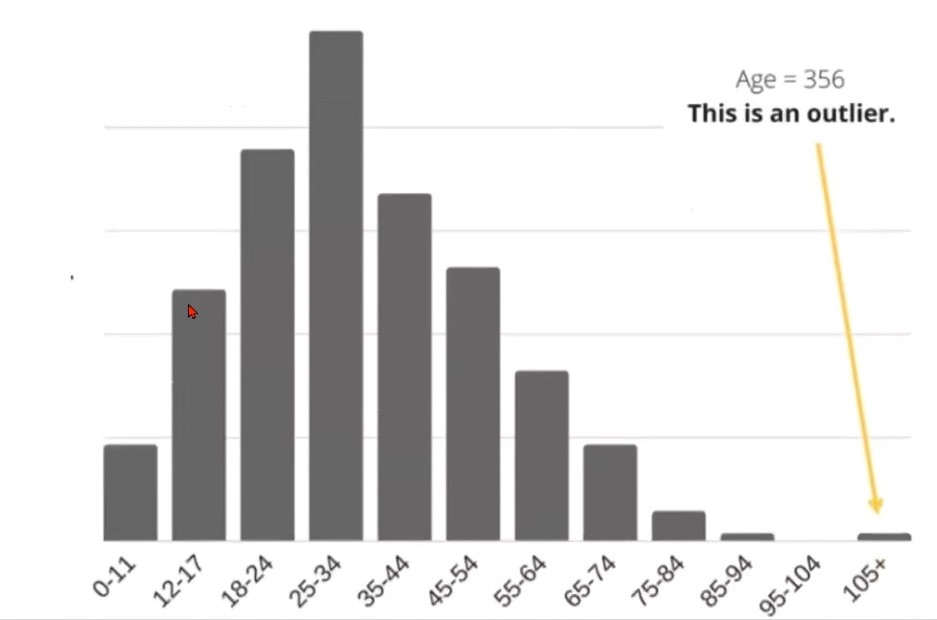

````                                        AGE                                                 ````

In [480]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2.0,4865.0,5624.0,208.0,360.0,1.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0
3,0.0,3813.0,0.0,116.0,180.0,1.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0


In [481]:
X_train_num_imputed.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.755601,5497.806517,1529.347861,143.926680,341.792261,0.857434
std,1.026856,6587.209015,2512.306332,82.578069,63.628880,0.349986
min,0.000000,645.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2816.000000,0.000000,100.000000,360.000000,1.000000
50%,0.000000,3762.000000,1167.000000,128.000000,360.000000,1.000000
75%,2.000000,5790.000000,2241.000000,162.000000,360.000000,1.000000
max,3.000000,81000.000000,33837.000000,700.000000,480.000000,1.000000


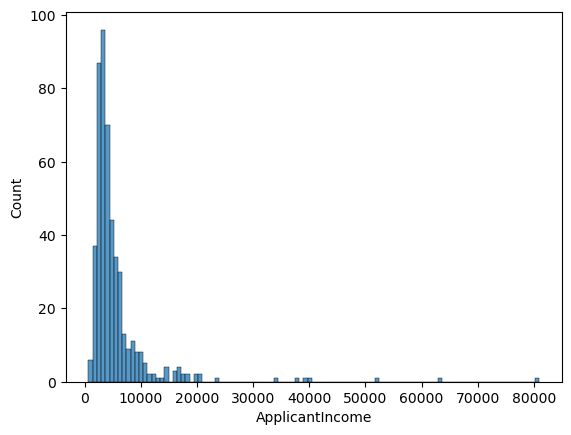

In [482]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

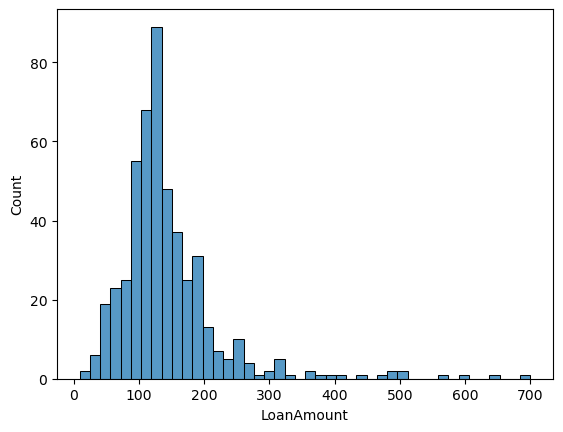

In [483]:
sns.histplot(data = X_train_num_imputed, x = 'LoanAmount')
plt.show()

In [484]:
X_train_num_imputed.describe(percentiles = [0.01, 0.025, 0.05, 0.1, 0.5, 0.75, 0.9, 0.95, 0.975, 0.99])

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.755601,5497.806517,1529.347861,143.926680,341.792261,0.857434
std,1.026856,6587.209015,2512.306332,82.578069,63.628880,0.349986
min,0.000000,645.000000,0.000000,9.000000,12.000000,0.000000
1%,0.000000,1370.100000,0.000000,34.500000,84.000000,0.000000
2.5%,0.000000,1764.750000,0.000000,45.250000,180.000000,0.000000
5%,0.000000,1877.500000,0.000000,55.500000,180.000000,0.000000
10%,0.000000,2213.000000,0.000000,71.000000,300.000000,0.000000
50%,0.000000,3762.000000,1167.000000,128.000000,360.000000,1.000000
75%,2.000000,5790.000000,2241.000000,162.000000,360.000000,1.000000


#### Variable ``ApplicantIncome``

In [485]:
p1 = np.percentile(X_train_num_imputed['ApplicantIncome'], 1)
p95 = np.percentile(X_train_num_imputed['ApplicantIncome'], 95)

In [486]:
p1, p95

(1370.1000000000001, 14633.0)

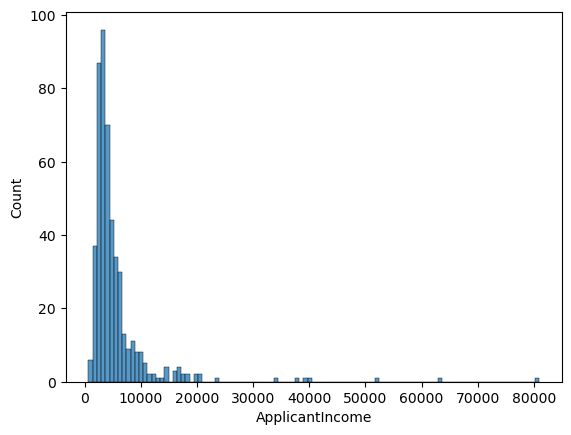

In [487]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

``np.clip`` limita los bordes del intervalo a unos valores dados 

In [488]:
X_train_num_imputed['ApplicantIncome'] = np.clip(X_train_num_imputed['ApplicantIncome'], p1, p95)

Veamos los cambios en la distribución:

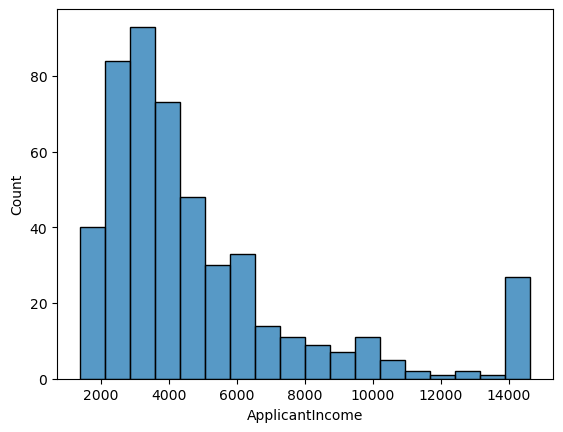

In [489]:
sns.histplot(data = X_train_num_imputed, x = 'ApplicantIncome')
plt.show()

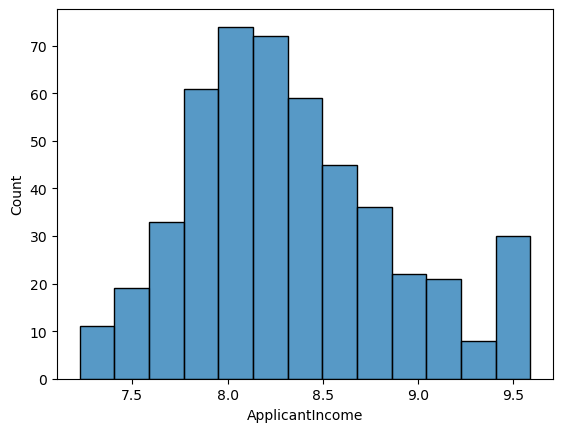

In [490]:
# aplicación de la transformada logaritmo (para normalizar variables)
# para poder reducir los valores de una variable con valores muy grandes
sns.histplot(np.log(X_train_num_imputed['ApplicantIncome']))
plt.show()

In [491]:
X_train_num_imputed['ApplicantIncome'].describe()

count      491.000000
mean      4889.088595
std       3189.765743
min       1370.100000
25%       2816.000000
50%       3762.000000
75%       5790.000000
max      14633.000000
Name: ApplicantIncome, dtype: float64

In [492]:
np.log(X_train_num_imputed['ApplicantIncome']).describe()

count    491.000000
mean       8.331311
std        0.547685
min        7.222639
25%        7.943054
50%        8.232706
75%        8.663886
max        9.591035
Name: ApplicantIncome, dtype: float64

### 8. Consolidación

In [493]:
X_train_cat_dummies.head()

,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,1,0
1,1,0,1,0,0,0
2,1,1,1,0,1,0
3,0,0,0,0,0,1
4,1,1,0,0,0,0


In [494]:
X_train_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,2.0,4865.0,5624.0,208.0,360.0,1.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0
3,0.0,3813.0,0.0,116.0,180.0,1.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0


In [495]:
X_train_cat_dummies.shape 

(491, 6)

In [496]:
X_train_num_imputed.shape

(491, 6)

``pd.concat`` nos permite concatenar las bases anteriormente revisadas:

In [497]:
X_train_total = pd.concat([X_train_num_imputed, X_train_cat_dummies], axis= 1)
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,1,0
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,0,0
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,1,0
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,0,1
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,0,0


Hagamos una última verificación de nulos

In [498]:
X_train_total.isnull().sum()

Dependents                 0
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
dtype: int64

### 9. Creación de nuevas variables

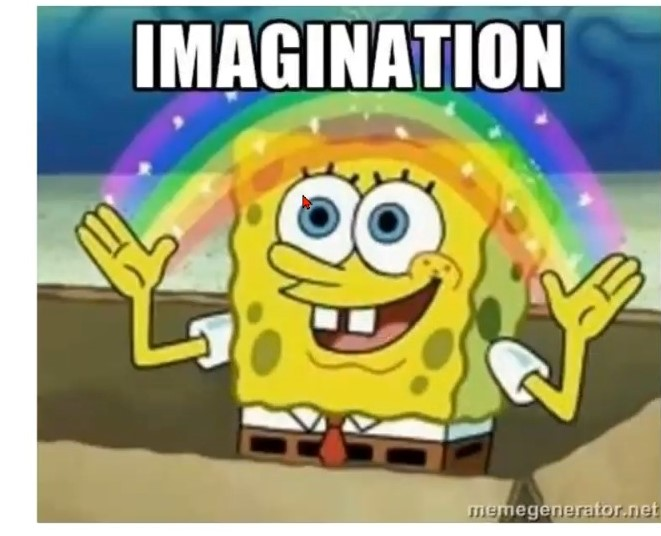

In [499]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,1,0
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,0,0
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,1,0
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,0,1
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,0,0


In [500]:
X_train_total['TotalIncome'] = X_train_total['ApplicantIncome'] + X_train_total['CoapplicantIncome']

In [501]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,1,0,10489.0
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,0,0,4885.0
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,1,0,4511.0
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,0,1,3813.0
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,0,0,4704.0


In [502]:
X_train_total['TotalIncomeByPerson'] = X_train_total['TotalIncome'] / (X_train_total['Dependents'] + 1)

In [503]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,1,0,10489.0,3496.333333
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,0,0,4885.0,4885.000000
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,1,0,4511.0,4511.000000
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,0,1,3813.0,3813.000000
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,0,0,4704.0,2352.000000


In [504]:
X_train_total['Cuota'] = X_train_total['LoanAmount'] * 1000 / X_train_total['Loan_Amount_Term']
X_train_total['%Cuota'] = X_train_total['Cuota'] / X_train_total['TotalIncome'] #nivel de endeudamiento

In [505]:
X_train_total.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,1,0,10489.0,3496.333333,577.777778,0.055084
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,0,0,4885.0,4885.000000,277.777778,0.056863
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,1,0,4511.0,4511.000000,322.222222,0.071430
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,0,1,3813.0,3813.000000,644.444444,0.169012
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,0,0,4704.0,2352.000000,405.555556,0.086215


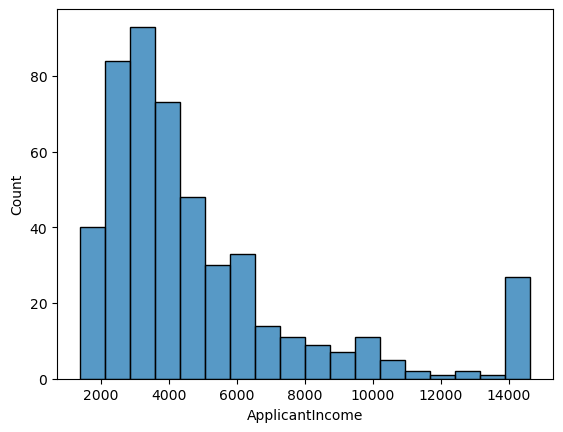

In [506]:
sns.histplot(data = X_train_total, x = 'ApplicantIncome')
plt.show()

In [507]:
X_train_total['log_ApplicantIncome'] = np.log(X_train_total['ApplicantIncome'])
X_train_total['log_TotalIncome'] = np.log(X_train_total['TotalIncome'])

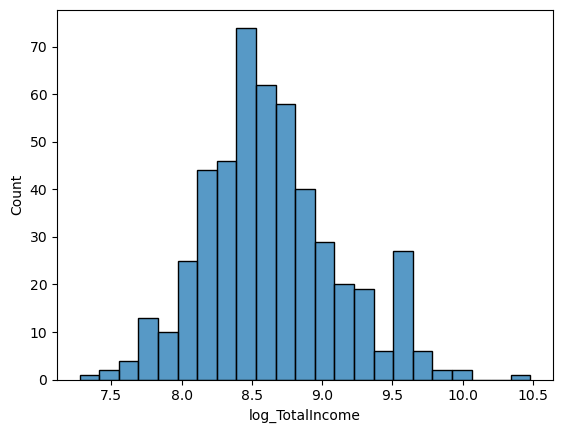

In [508]:
sns.histplot(data = X_train_total, x = 'log_TotalIncome')
plt.show()

### 10.Escalamiento (ayuda a controlar la varianza)

Esto es importante para variables con diferencias en escala, y siempre tiene que aplicarse en ML no supervisado

In [509]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
scaler = MinMaxScaler()

In [510]:
X_scaled = scaler.fit_transform(X_train_total)

In [511]:
columnas = X_train_total.columns
columnas

Index(['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Gender_Male', 'Married_Yes',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'TotalIncome',
       'TotalIncomeByPerson', 'Cuota', '%Cuota', 'log_ApplicantIncome',
       'log_TotalIncome'],
      dtype='object')

In [512]:
X_train_scaled = pd.DataFrame(data = X_scaled, columns = columnas)

X_train_scaled

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
0,0.666667,0.263509,0.166209,0.287988,0.743590,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.264293,0.086292,0.059922,0.039091,0.535039,0.618476
1,0.000000,0.167980,0.038035,0.131693,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.100581,0.125726,0.027401,0.040537,0.407658,0.380299
2,0.000000,0.092732,0.056477,0.154848,0.743590,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.089656,0.115106,0.032219,0.052382,0.270490,0.355473
3,0.000000,0.184190,0.000000,0.154848,0.358974,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.069265,0.095285,0.067148,0.131725,0.432163,0.303078
4,0.333333,0.106832,0.056654,0.198263,0.743590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.095294,0.053797,0.041253,0.064403,0.299816,0.368531
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,0.000000,0.524991,0.000000,0.392185,0.743590,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.201309,0.223637,0.081602,0.070194,0.762263,0.546756
487,0.333333,0.000000,0.089311,0.146165,0.743590,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.086182,0.049369,0.030413,0.050868,0.000000,0.347148
488,0.000000,0.166019,0.121583,0.206946,0.743590,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.182408,0.205265,0.043059,0.038968,0.404595,0.521565
489,0.333333,0.707228,0.000000,0.438495,0.743590,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.271917,0.139640,0.091238,0.059854,0.869796,0.626137


In [513]:
X_train_scaled.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome
count,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000,491.000000
mean,0.251867,0.265326,0.045198,0.195263,0.704684,0.857434,0.822811,0.657841,0.230143,0.120163,0.378819,0.321792,0.145378,0.121380,0.048363,0.058178,0.468111,0.426604
std,0.342285,0.240503,0.074247,0.119505,0.135959,0.349986,0.382218,0.474916,0.421353,0.325484,0.485588,0.467640,0.107126,0.101240,0.058889,0.067377,0.231247,0.150168
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.109018,0.000000,0.131693,0.743590,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.079577,0.052832,0.028606,0.039716,0.304179,0.330675
50%,0.000000,0.180345,0.034489,0.172214,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.115217,0.103435,0.036435,0.050504,0.426477,0.410730
75%,0.666667,0.333253,0.066229,0.221418,0.743590,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.173804,0.157857,0.051491,0.060838,0.608533,0.509387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Comparación de distribuciones

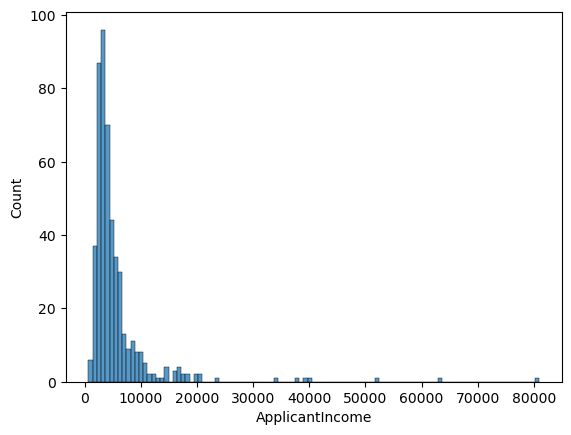

In [514]:
sns.histplot(X_train['ApplicantIncome'])
plt.show()

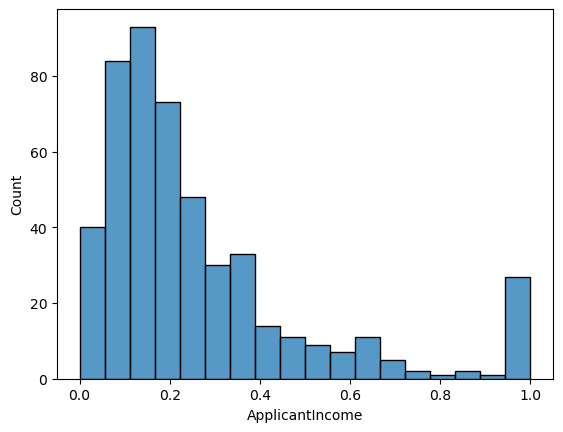

In [515]:
sns.histplot(X_train_scaled['ApplicantIncome'])
plt.show()

## Repetir todo el preprocesamiento para el conjunto de validación

In [516]:
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
543,Male,Yes,1,Not Graduate,No,2239,2524.0,128.0,360.0,1.0,Urban
488,Male,Yes,2,Graduate,Yes,4583,2083.0,160.0,360.0,1.0,Semiurban
167,Male,Yes,0,Graduate,No,2439,3333.0,129.0,360.0,1.0,Rural
460,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban
592,NaN,No,3+,Graduate,Yes,9357,0.0,292.0,360.0,1.0,Semiurban


In [517]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 123 entries, 543 to 485
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             120 non-null    object 
 1   Married            122 non-null    object 
 2   Dependents         120 non-null    object 
 3   Education          123 non-null    object 
 4   Self_Employed      114 non-null    object 
 5   ApplicantIncome    123 non-null    int64  
 6   CoapplicantIncome  123 non-null    float64
 7   LoanAmount         119 non-null    float64
 8   Loan_Amount_Term   119 non-null    float64
 9   Credit_History     113 non-null    float64
 10  Property_Area      123 non-null    object 
dtypes: float64(4), int64(1), object(6)
memory usage: 11.5+ KB


Variable de dependientes

In [518]:
X_test['Dependents']  = X_test['Dependents'].map({'0':0, '1':1, '2':2, '3+':3})

Imputación de nulos

In [519]:
X_test_cat = X_test.select_dtypes('object')
X_test_num = X_test.select_dtypes('number')

Numéricas

In [520]:
X_test_num_imputed = pd.DataFrame(imputer_num.transform(X_test_num), columns = X_test_num.columns)
X_test_num_imputed.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,2239.0,2524.0,128.0,360.0,1.0
1,2.0,4583.0,2083.0,160.0,360.0,1.0
2,0.0,2439.0,3333.0,129.0,360.0,1.0
3,0.0,2083.0,4083.0,160.0,360.0,1.0
4,3.0,9357.0,0.0,292.0,360.0,1.0


Categóricas

In [521]:
X_test_cat_imputed = pd.DataFrame(imputer_cat.transform(X_test_cat), columns = X_test_cat.columns)
X_test_cat_imputed.head()

,Gender,Married,Education,Self_Employed,Property_Area
0,Male,Yes,Not Graduate,No,Urban
1,Male,Yes,Graduate,Yes,Semiurban
2,Male,Yes,Graduate,No,Rural
3,Male,Yes,Graduate,Yes,Semiurban
4,Male,No,Graduate,Yes,Semiurban


Encoding

In [522]:
X_test_cat_dummies = pd.get_dummies(X_test_cat_imputed, drop_first=True)

Capeo de valores atípicos (con los obtenidos del train)

In [523]:
X_test_num_imputed['ApplicantIncome'] = np.clip(X_test_num_imputed['ApplicantIncome'], p1, p95)

Consolidación

In [524]:
X_test_total = pd.concat([X_test_num_imputed, X_test_cat_dummies], axis = 1)

In [525]:
X_test_total['TotalIncome'] = X_test_total['ApplicantIncome'] + X_test_total['CoapplicantIncome']
X_test_total['TotalIncomeByPerson'] = X_test_total['TotalIncome'] / (X_test_total['Dependents'] + 1)
X_test_total['Cuota'] = X_test_total['LoanAmount'] * 1000 / X_test_total['Loan_Amount_Term']
X_test_total['%Cuota'] = X_test_total['Cuota'] / X_test_total['TotalIncome'] #nivel de endeudamiento

In [526]:
X_test_total['log_ApplicantIncome'] = np.log(X_test_total['ApplicantIncome'])
X_test_total['log_TotalIncome'] = np.log(X_test_total['TotalIncome'])

In [527]:
X_test_scaled = pd.DataFrame(data = scaler.fit_transform(X_test_total), columns = X_test_total.columns)

Verificamos que ambas tengan la misma cantidad de columnas 

In [528]:
X_test_scaled.shape

(123, 18)

In [529]:
y_test.shape

(123,)

Guardamos ambos datasets preprocesados

In [530]:
X_train_export = X_train_scaled.copy()
X_train_export[target] = y_train.values

X_test_export = X_test_scaled.copy()
X_test_export[target] = y_test.values

In [531]:
X_train_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.666667,0.263509,0.166209,0.287988,0.743590,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.264293,0.086292,0.059922,0.039091,0.535039,0.618476,0
1,0.000000,0.167980,0.038035,0.131693,0.743590,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.100581,0.125726,0.027401,0.040537,0.407658,0.380299,1
2,0.000000,0.092732,0.056477,0.154848,0.743590,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.089656,0.115106,0.032219,0.052382,0.270490,0.355473,1
3,0.000000,0.184190,0.000000,0.154848,0.358974,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.069265,0.095285,0.067148,0.131725,0.432163,0.303078,0
4,0.333333,0.106832,0.056654,0.198263,0.743590,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.095294,0.053797,0.041253,0.064403,0.299816,0.368531,1


In [532]:
X_test_export.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,TotalIncomeByPerson,Cuota,%Cuota,log_ApplicantIncome,log_TotalIncome,Loan_Status
0,0.333333,0.065514,0.060576,0.179130,0.72973,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.064182,0.078327,0.127273,0.101427,0.207375,0.266807,0
1,0.666667,0.242247,0.049992,0.234783,0.72973,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.110711,0.070556,0.168831,0.089219,0.509826,0.378773,0
2,0.000000,0.080593,0.079991,0.180870,0.72973,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.088853,0.243505,0.128571,0.082191,0.243500,0.330808,0
3,0.000000,0.053751,0.097991,0.234783,0.72973,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.098486,0.262700,0.168831,0.097494,0.176882,0.352802,0
4,1.000000,0.602199,0.000000,0.464348,0.72973,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.176508,0.076268,0.340260,0.119847,0.811199,0.491725,0


In [533]:
X_train_export.to_csv('train_preprocesed.csv', index= False)
X_test_export.to_csv('test_preprocesed.csv', index= False)

## Balanceo de clases 

Todo balanceo se realiza solo sobre la data de entrenamiento

In [534]:
#target original en la base train
y_train.mean()   #considerar las técnicas de balanceo cuando el target original es menor a 5%

0.3136456211812627

In [535]:
# cantidad de registros de la base
X_train_scaled.shape

(491, 18)

In [536]:
y_train.value_counts()

0    337
1    154
Name: Loan_Status, dtype: int64

##### Undersampling y oversampling

In [537]:
#!pip install imblearn

In [538]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [539]:
# Submuestreo: Seleccionamos todo el target y el número menor de observaciones no target

rus = RandomUnderSampler(sampling_strategy = 1, random_state =seed)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
#Es un valor entre 0 y 1. 1 indica 50%/50%

In [540]:
X_rus, y_rus = rus.fit_resample(X_train_scaled, y_train)

In [541]:
X_rus.shape

(308, 18)

In [542]:
y_rus.mean()

0.5

In [543]:
y_rus.value_counts()

0    154
1    154
Name: Loan_Status, dtype: int64

In [544]:
# Submuestreo: Ampliamos el número de observaciones target mediante remuestreo

rov = RandomOverSampler(sampling_strategy = 1, random_state =seed)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
#Es un valor entre 0 y 1. 1 indica 50%/50%

In [545]:
X_rov, y_rov = rov.fit_resample(X_train_scaled, y_train)

In [546]:
X_rov.shape

(674, 18)

In [547]:
y_rov.mean()

0.5

In [548]:
y_rov.value_counts()

0    337
1    337
Name: Loan_Status, dtype: int64

##### Exportar conjuntos de datos balanceados

In [549]:
X_train_export_rus = X_rus.copy()
X_train_export_rus[target] = y_rus.values

In [550]:
X_train_export_rus.to_csv('train_preprocesed_rus.csv', index = False)

In [551]:
X_train_export_rov = X_rov.copy()
X_train_export_rov[target] = y_rov.values

In [552]:
X_train_export_rov.to_csv('train_preprocesed_rov.csv', index= False)

##### Smote

In [553]:
from imblearn.over_sampling import SMOTE

In [554]:
#smote crea nuevos "unos" que se parezcan  a los originales mediante vecinos cercanos (KNV)

smote = SMOTE(sampling_strategy = 1, random_state = seed)

# sampling_strategy es un valor que indica la proporción final de unos y ceros que deben quedar luego del remuestreo
# Es un valor entre 0 y 1. 1 indica 50%/50%

In [555]:
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [556]:
y_smote.mean()

0.5

In [557]:
y_smote.value_counts()

0    337
1    337
Name: Loan_Status, dtype: int64

##### Smote + Tomek

In [558]:
from imblearn.combine import SMOTETomek

In [559]:
smotetomek = SMOTETomek(sampling_strategy = 1, random_state =seed)

In [560]:
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train_scaled, y_train)

In [561]:
y_smotetomek.mean()

0.5

In [562]:
y_smotetomek.value_counts()

0    308
1    308
Name: Loan_Status, dtype: int64

##### Exportar conjuntos de datos balanceados

In [563]:
X_train_smotetomek = x_smotetomek.copy()
X_train_smotetomek[target] = y_smotetomek.values 

NameError: name 'x_smotetomek' is not defined

In [564]:
X_train_smotetomek.to_csv('train_preprocesed_smotetomek.csv', index = False)

NameError: name 'X_train_smotetomek' is not defined

## Seleccion de variables

In [565]:
X_train_export.shape

(491, 19)

In [566]:
!pip install scorecardpy

Defaulting to user installation because normal site-packages is not writeable


In [567]:
# Filtrar las variables más relevantes por IV!

import scorecardpy as sc
desarrll_subset_woe = sc.var_filter(X_train_export, y = target)

[INFO] filtering variables ...


In [568]:
desarrll_subset_woe.head()

,LoanAmount,Education_Not Graduate,CoapplicantIncome,log_ApplicantIncome,Credit_History,Property_Area_Semiurban,Dependents,TotalIncomeByPerson,ApplicantIncome,Loan_Amount_Term,log_TotalIncome,Cuota,TotalIncome,Loan_Status
0,0.287988,0.0,0.166209,0.535039,1.0,1.0,0.666667,0.086292,0.263509,0.743590,0.618476,0.059922,0.264293,0
1,0.131693,1.0,0.038035,0.407658,1.0,0.0,0.000000,0.125726,0.167980,0.743590,0.380299,0.027401,0.100581,1
2,0.154848,1.0,0.056477,0.270490,0.0,1.0,0.000000,0.115106,0.092732,0.743590,0.355473,0.032219,0.089656,1
3,0.154848,0.0,0.000000,0.432163,1.0,0.0,0.000000,0.095285,0.184190,0.358974,0.303078,0.067148,0.069265,0
4,0.198263,0.0,0.056654,0.299816,0.0,0.0,0.333333,0.053797,0.106832,0.743590,0.368531,0.041253,0.095294,1


In [569]:
# Creamos los cortes a traves de WOES
bins = sc.woebin(desarrll_subset_woe, y=target)

[INFO] creating woe binning ...


In [570]:
bins

{'log_ApplicantIncome':               variable          bin  count  count_distr  good  bad   badprob  \
 0  log_ApplicantIncome  [-inf,0.14)     26     0.052953    14   12  0.461538   
 1  log_ApplicantIncome  [0.14,0.26)     66     0.134420    50   16  0.242424   
 2  log_ApplicantIncome   [0.26,0.3)     30     0.061100    19   11  0.366667   
 3  log_ApplicantIncome    [0.3,inf)    369     0.751527   254  115  0.311653   
 
         woe    bin_iv  total_iv breaks  is_special_values  
 0  0.628980  0.022882  0.042352   0.14              False  
 1 -0.356304  0.015845  0.042352   0.26              False  
 2  0.236587  0.003560  0.042352    0.3              False  
 3 -0.009272  0.000064  0.042352    inf              False  ,
 'CoapplicantIncome':             variable            bin  count  count_distr  good  bad   badprob  \
 0  CoapplicantIncome   [-inf,0.005)    220     0.448065   145   75  0.340909   
 1  CoapplicantIncome  [0.005,0.035)     26     0.052953    24    2  0.076923   


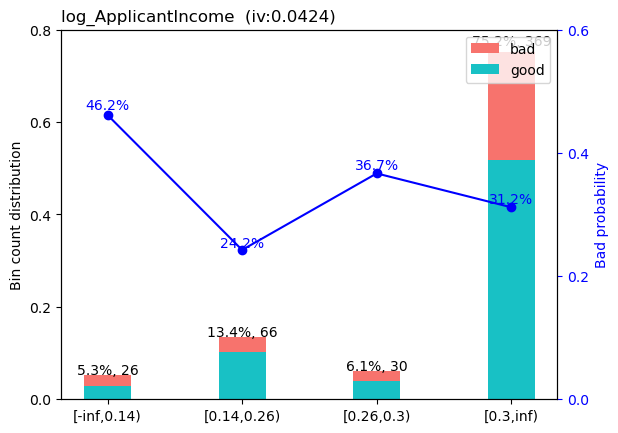

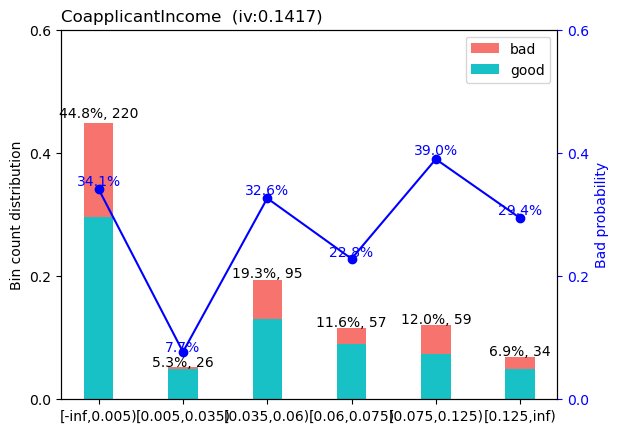

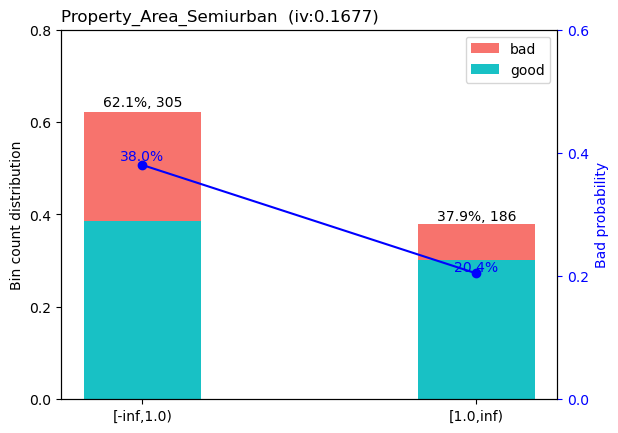

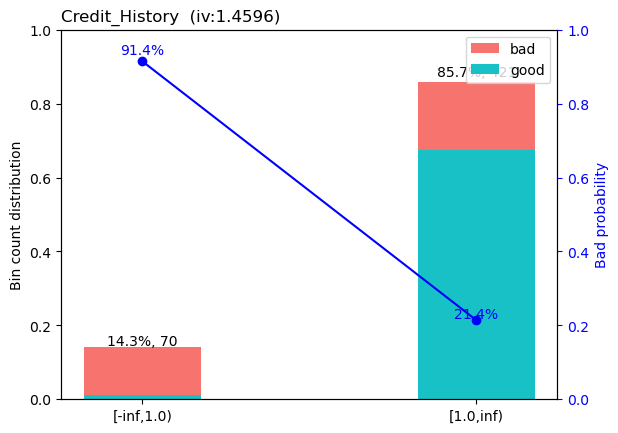

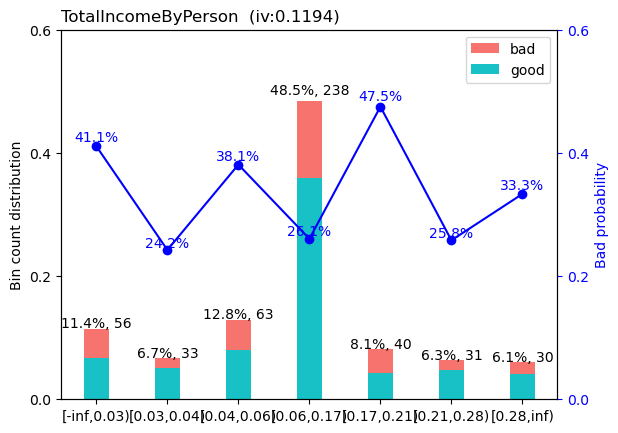

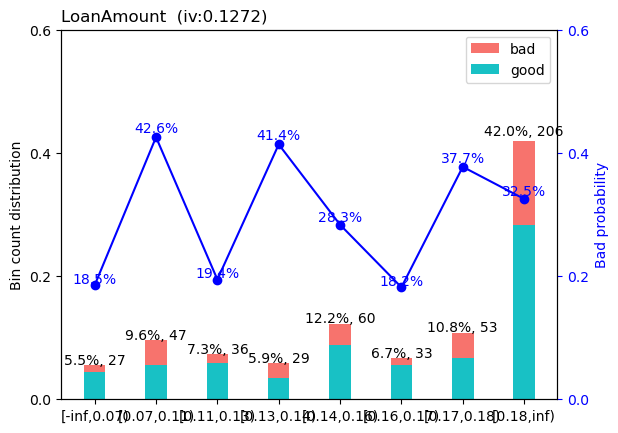

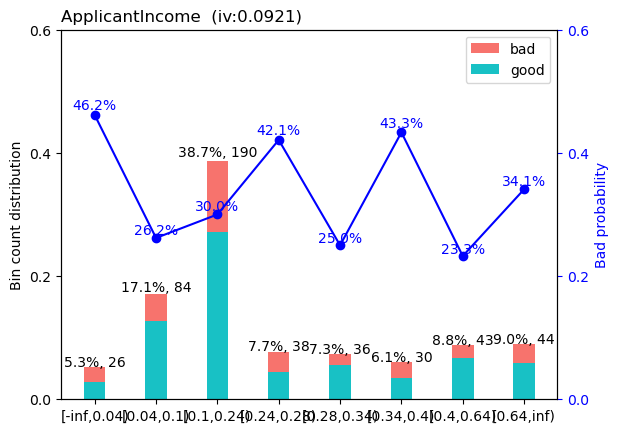

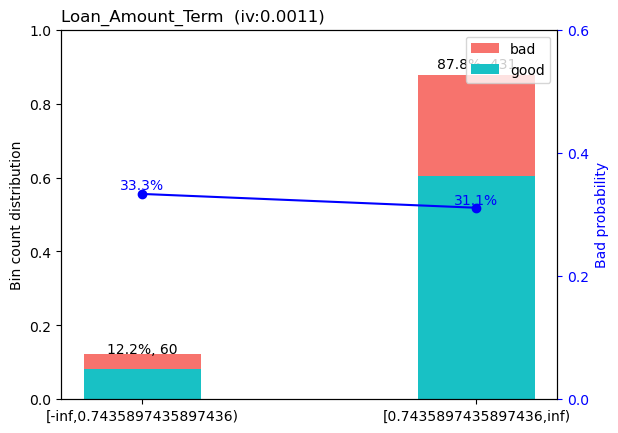

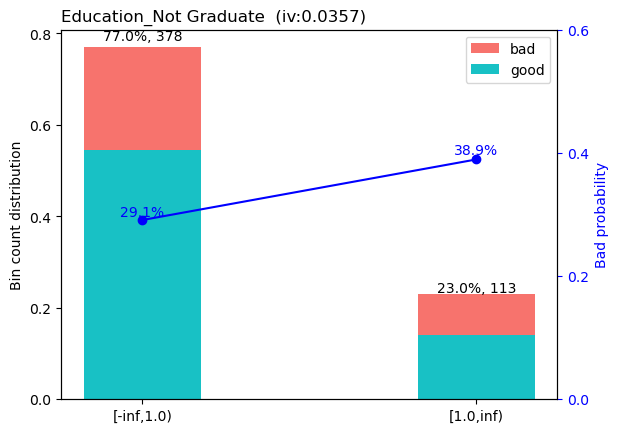

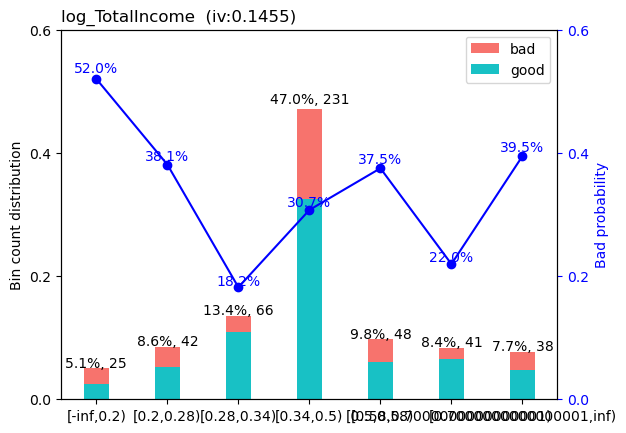

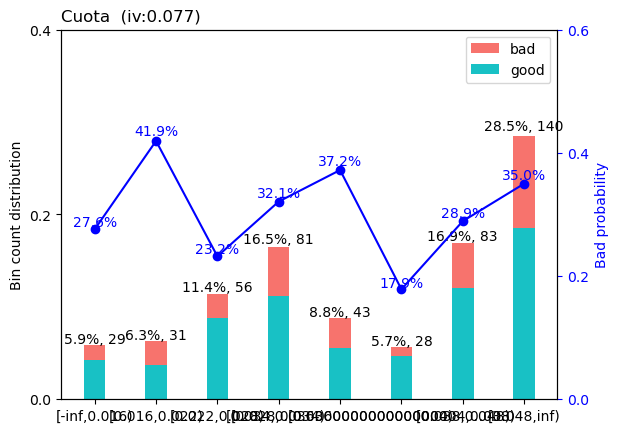

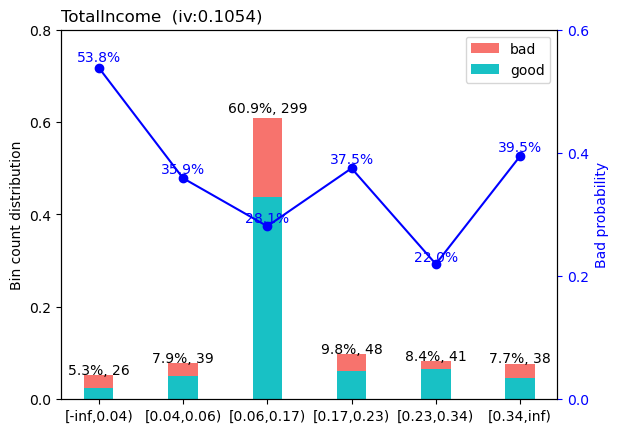

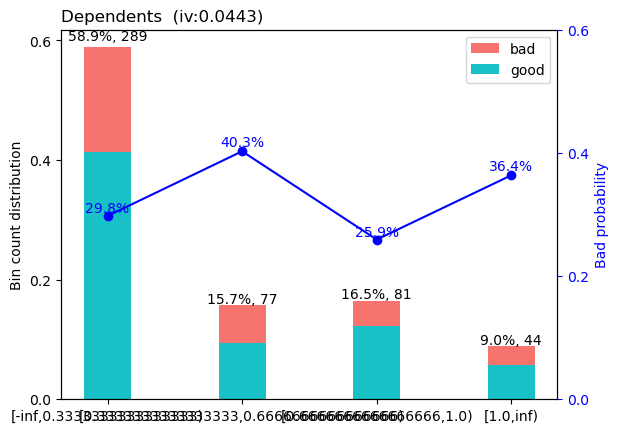

In [571]:
#Revisamos las relaciones bivariados y damos los insigths accionables a los negocios!
sc.woebin_plot(bins)
plt.show()

-------- 1/10 ApplicantIncome --------
>>> dt[ApplicantIncome].describe(): 
count    491.000000
mean       0.265326
std        0.240503
min        0.000000
25%        0.109018
50%        0.180345
75%        0.333253
max        1.000000
Name: ApplicantIncome, dtype: float64 



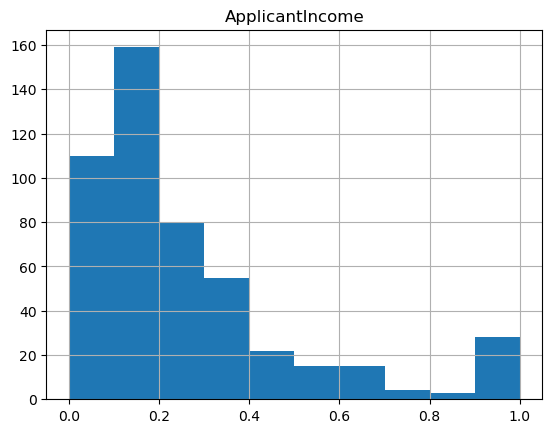

>>> Current breaks:
0.04,0.1,0.24,0.28,0.34,0.4,0.64 



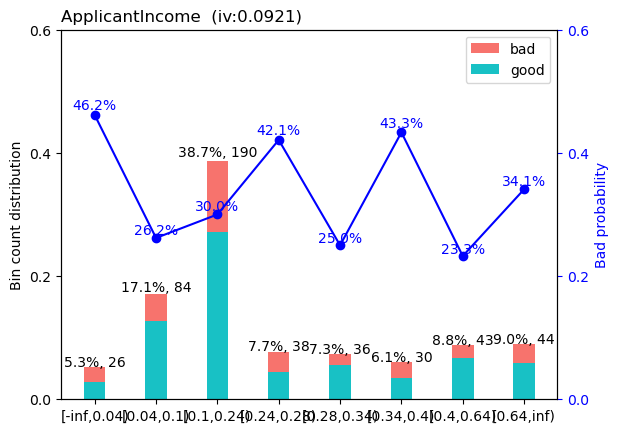

>>> Adjust breaks for (1/10) ApplicantIncome?
1: next 
2: yes 
3: back
Selection: 2
>>> Enter modified breaks: 0.2, 0.3, 0.45, 0.6
[INFO] creating woe binning ...
>>> Current breaks:
0.6, 0.45, 0.3, 0.2 



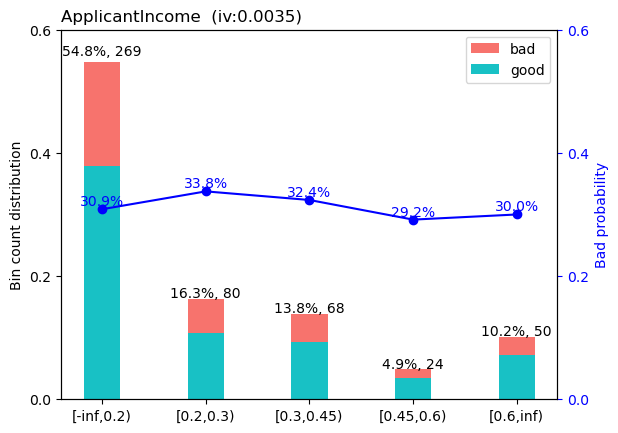

>>> Adjust breaks for (1/10) ApplicantIncome?
1: next 
2: yes 
3: back
Selection: 1
-------- 2/10 Credit_History --------
>>> dt[Credit_History].describe(): 
count    491.000000
mean       0.857434
std        0.349986
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64 

>>> dt[Credit_History].value_counts(): 
1.0    421
0.0     70
Name: Credit_History, dtype: int64 

>>> Current breaks:
1.0 



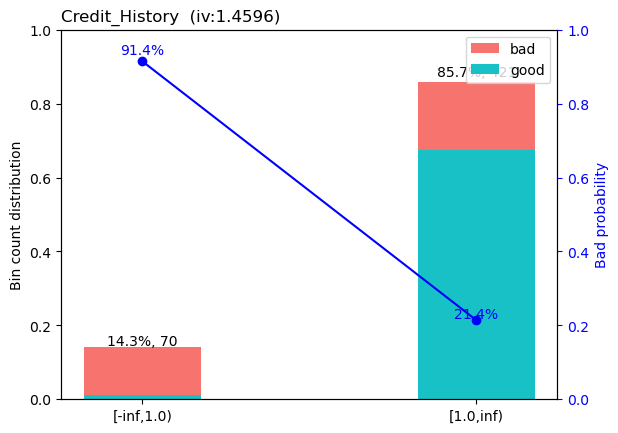

>>> Adjust breaks for (2/10) Credit_History?
1: next 
2: yes 
3: back
Selection: 1
-------- 3/10 Cuota --------
>>> dt[Cuota].describe(): 
count    491.000000
mean       0.048363
std        0.058889
min        0.000000
25%        0.028606
50%        0.036435
75%        0.051491
max        1.000000
Name: Cuota, dtype: float64 



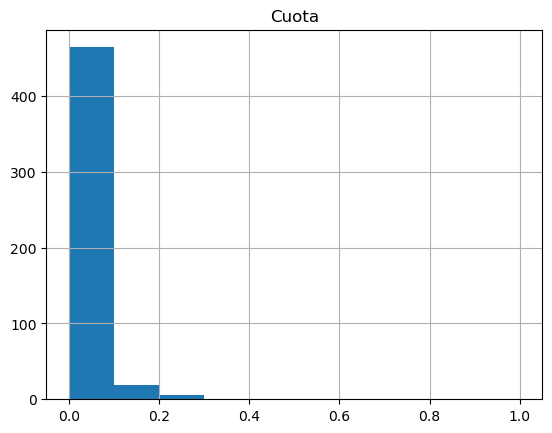

>>> Current breaks:
0.016,0.022,0.028,0.034,0.036000000000000004,0.038,0.048 



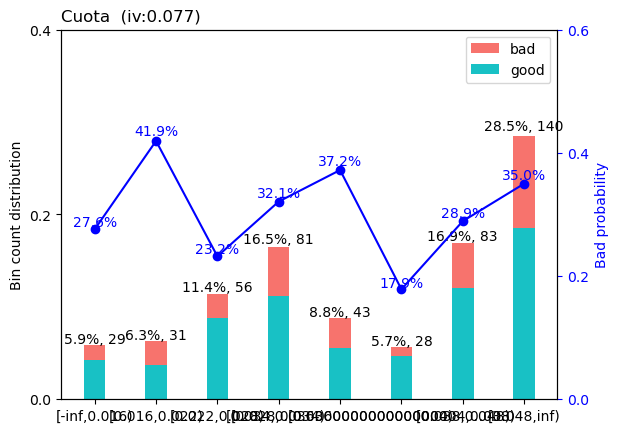

>>> Adjust breaks for (3/10) Cuota?
1: next 
2: yes 
3: back
Selection: 1
-------- 4/10 Dependents --------
>>> dt[Dependents].describe(): 
count    491.000000
mean       0.251867
std        0.342285
min        0.000000
25%        0.000000
50%        0.000000
75%        0.666667
max        1.000000
Name: Dependents, dtype: float64 

>>> dt[Dependents].value_counts(): 
0.000000    289
0.666667     81
0.333333     77
1.000000     44
Name: Dependents, dtype: int64 

>>> Current breaks:
0.3333333333333333,0.6666666666666666,1.0 



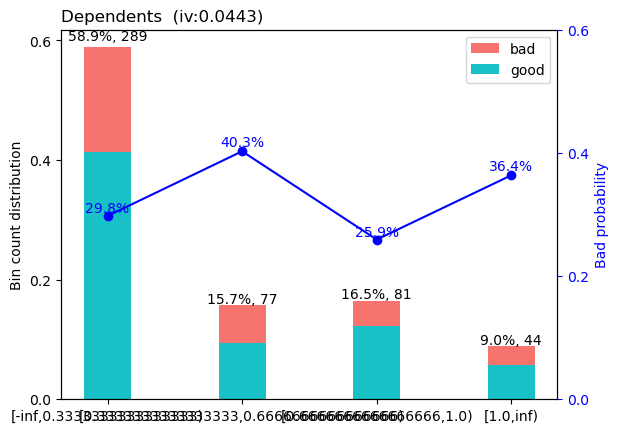

>>> Adjust breaks for (4/10) Dependents?
1: next 
2: yes 
3: back
Selection: 1
-------- 5/10 LoanAmount --------
>>> dt[LoanAmount].describe(): 
count    491.000000
mean       0.195263
std        0.119505
min        0.000000
25%        0.131693
50%        0.172214
75%        0.221418
max        1.000000
Name: LoanAmount, dtype: float64 



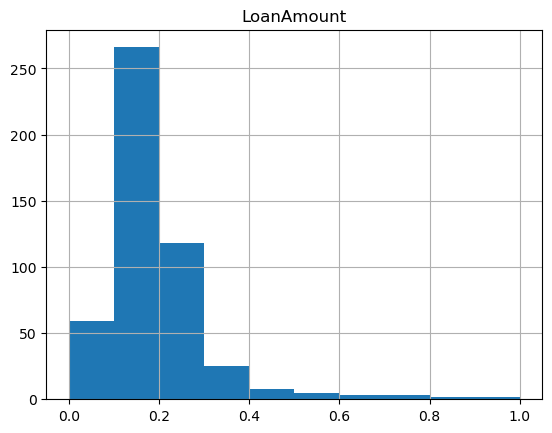

>>> Current breaks:
0.07,0.11,0.13,0.14,0.16,0.17,0.18 



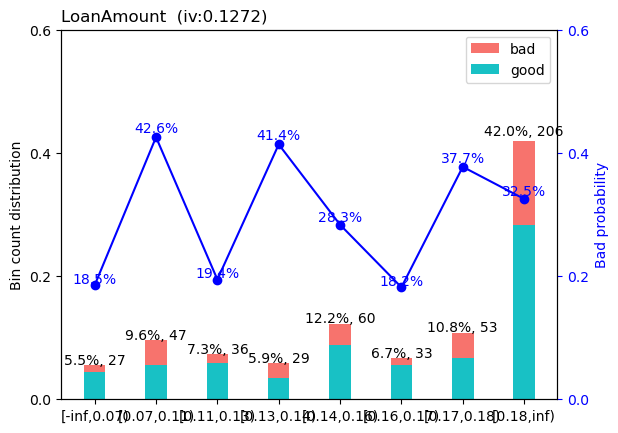

>>> Adjust breaks for (5/10) LoanAmount?
1: next 
2: yes 
3: back
Selection: 1
-------- 6/10 Property_Area_Semiurban --------
>>> dt[Property_Area_Semiurban].describe(): 
count    491.000000
mean       0.378819
std        0.485588
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Property_Area_Semiurban, dtype: float64 

>>> dt[Property_Area_Semiurban].value_counts(): 
0.0    305
1.0    186
Name: Property_Area_Semiurban, dtype: int64 

>>> Current breaks:
1.0 



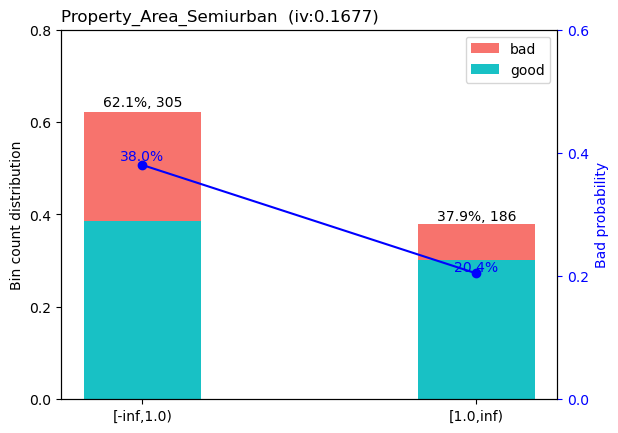

>>> Adjust breaks for (6/10) Property_Area_Semiurban?
1: next 
2: yes 
3: back
Selection: 1
-------- 7/10 TotalIncome --------
>>> dt[TotalIncome].describe(): 
count    491.000000
mean       0.145378
std        0.107126
min        0.000000
25%        0.079577
50%        0.115217
75%        0.173804
max        1.000000
Name: TotalIncome, dtype: float64 



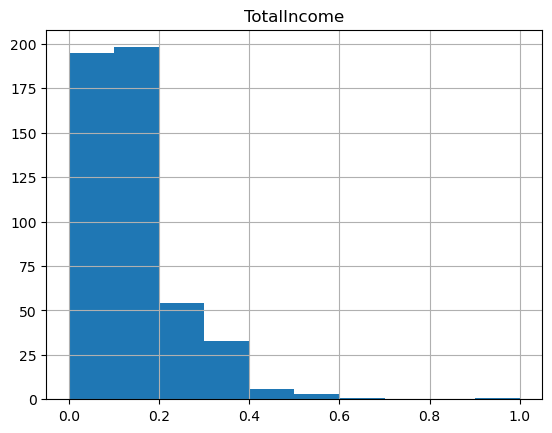

>>> Current breaks:
0.04,0.06,0.17,0.23,0.34 



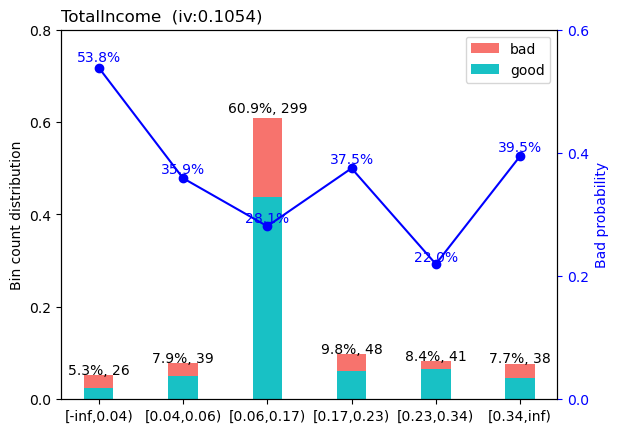

>>> Adjust breaks for (7/10) TotalIncome?
1: next 
2: yes 
3: back
Selection: 1
-------- 8/10 TotalIncomeByPerson --------
>>> dt[TotalIncomeByPerson].describe(): 
count    491.000000
mean       0.121380
std        0.101240
min        0.000000
25%        0.052832
50%        0.103435
75%        0.157857
max        1.000000
Name: TotalIncomeByPerson, dtype: float64 



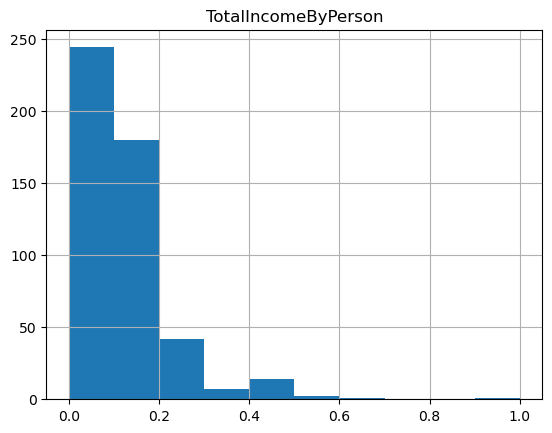

>>> Current breaks:
0.03,0.04,0.06,0.17,0.21,0.28 



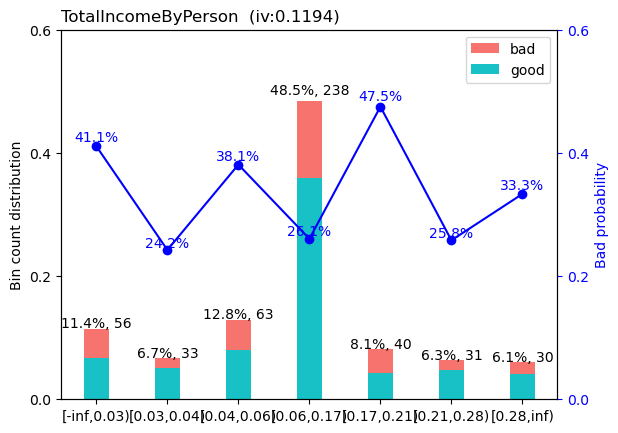

>>> Adjust breaks for (8/10) TotalIncomeByPerson?
1: next 
2: yes 
3: back
Selection: 1
-------- 9/10 log_ApplicantIncome --------
>>> dt[log_ApplicantIncome].describe(): 
count    491.000000
mean       0.468111
std        0.231247
min        0.000000
25%        0.304179
50%        0.426477
75%        0.608533
max        1.000000
Name: log_ApplicantIncome, dtype: float64 



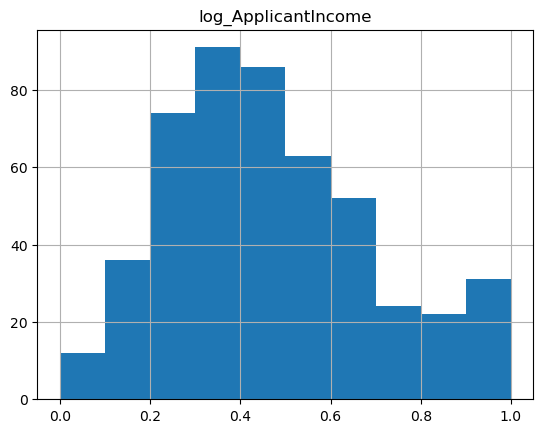

>>> Current breaks:
0.14,0.26,0.3 



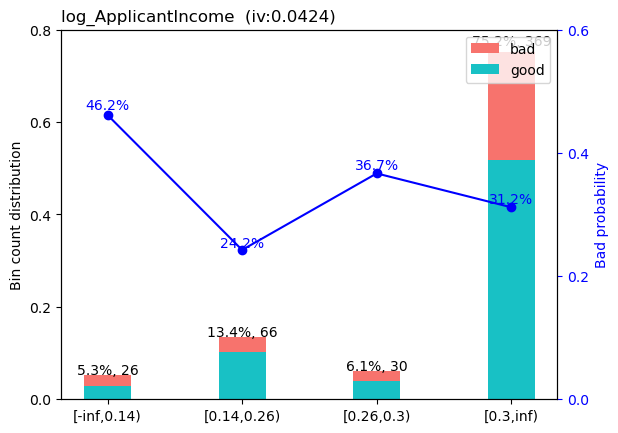

>>> Adjust breaks for (9/10) log_ApplicantIncome?
1: next 
2: yes 
3: back
Selection: 1
-------- 10/10 log_TotalIncome --------
>>> dt[log_TotalIncome].describe(): 
count    491.000000
mean       0.426604
std        0.150168
min        0.000000
25%        0.330675
50%        0.410730
75%        0.509387
max        1.000000
Name: log_TotalIncome, dtype: float64 



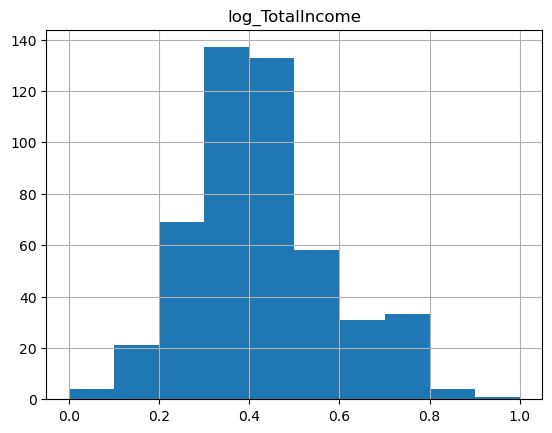

>>> Current breaks:
0.2,0.28,0.34,0.5,0.58,0.7000000000000001 



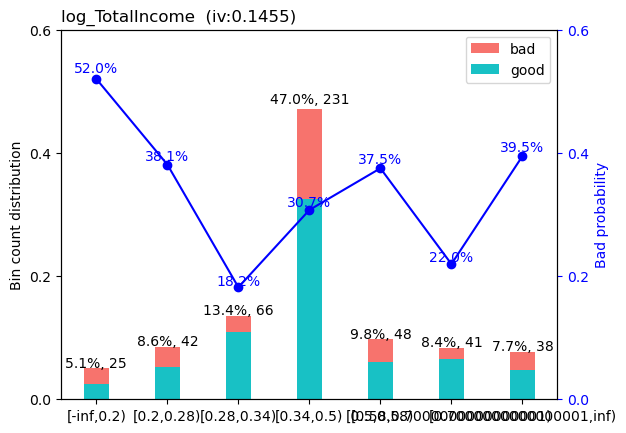

>>> Adjust breaks for (10/10) log_TotalIncome?
1: next 
2: yes 
3: back
Selection: 1


In [572]:
# binning adjustment
## adjust breaks interactively 
breaks_adj = sc.woebin_adj(desarrll_subset_woe, target, bins)

In [573]:
breaks_adj

"{'ApplicantIncome': [0.2, 0.3, 0.45, 0.6], 'CoapplicantIncome': [0.005,0.035,0.06,0.075,0.125], 'Credit_History': [1.0], 'Cuota': [0.016,0.022,0.028,0.034,0.036000000000000004,0.038,0.048], 'Dependents': [0.3333333333333333,0.6666666666666666,1.0], 'Education_Not Graduate': [1.0], 'LoanAmount': [0.07,0.11,0.13,0.14,0.16,0.17,0.18], 'Loan_Amount_Term': [0.7435897435897436], 'Property_Area_Semiurban': [1.0], 'TotalIncome': [0.04,0.06,0.17,0.23,0.34], 'TotalIncomeByPerson': [0.03,0.04,0.06,0.17,0.21,0.28], 'log_ApplicantIncome': [0.14,0.26,0.3], 'log_TotalIncome': [0.2,0.28,0.34,0.5,0.58,0.7000000000000001]}"

In [574]:
bins_adj = sc.woebin(desarrll_subset_woe, y=target, breaks_list =breaks_adj)

[INFO] creating woe binning ...


In [576]:
train_woe = sc.woebin_ply(desarrll_subset_woe, bins_adj)

[INFO] converting into woe values ...


In [577]:
train_woe.head()

,Loan_Status,log_ApplicantIncome_woe,CoapplicantIncome_woe,Property_Area_Semiurban_woe,Credit_History_woe,TotalIncomeByPerson_woe,LoanAmount_woe,ApplicantIncome_woe,Loan_Amount_Term_woe,Education_Not Graduate_woe,log_TotalIncome_woe,Cuota_woe,TotalIncome_woe,Dependents_woe
0,0,-0.009272,-0.092338,-0.576496,-0.519178,-0.260219,0.053349,0.108675,-0.012762,-0.107376,-0.485381,0.164091,-0.485381,-0.266692
1,1,-0.009272,0.058234,0.294974,-0.519178,-0.260219,0.434824,-0.023776,-0.012762,0.333213,-0.029364,-0.413120,-0.156691,-0.075728
2,1,0.236587,0.058234,-0.576496,3.150254,-0.260219,-0.144856,-0.023776,-0.012762,0.333213,-0.029364,0.033894,-0.156691,-0.075728
3,0,-0.009272,0.123885,0.294974,-0.519178,-0.260219,-0.144856,-0.023776,0.089983,-0.107376,-0.720947,0.164091,-0.156691,-0.075728
4,1,0.236587,0.058234,0.294974,3.150254,0.297623,0.053349,-0.023776,-0.012762,-0.107376,-0.029364,-0.116353,-0.156691,0.388476


In [578]:
train_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Loan_Status                  491 non-null    int64  
 1   log_ApplicantIncome_woe      491 non-null    float64
 2   CoapplicantIncome_woe        491 non-null    float64
 3   Property_Area_Semiurban_woe  491 non-null    float64
 4   Credit_History_woe           491 non-null    float64
 5   TotalIncomeByPerson_woe      491 non-null    float64
 6   LoanAmount_woe               491 non-null    float64
 7   ApplicantIncome_woe          491 non-null    float64
 8   Loan_Amount_Term_woe         491 non-null    float64
 9   Education_Not Graduate_woe   491 non-null    float64
 10  log_TotalIncome_woe          491 non-null    float64
 11  Cuota_woe                    491 non-null    float64
 12  TotalIncome_woe              491 non-null    float64
 13  Dependents_woe      

In [579]:
# agregando las variables woe creadas a la base general 

X_train_total_woe = pd.concat([X_train_total, train_woe], axis=1)
X_train_total_woe.head()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,...,Credit_History_woe,TotalIncomeByPerson_woe,LoanAmount_woe,ApplicantIncome_woe,Loan_Amount_Term_woe,Education_Not Graduate_woe,log_TotalIncome_woe,Cuota_woe,TotalIncome_woe,Dependents_woe
0,2.0,4865.0,5624.0,208.0,360.0,1.0,1,1,0,0,...,-0.519178,-0.260219,0.053349,0.108675,-0.012762,-0.107376,-0.485381,0.164091,-0.485381,-0.266692
1,0.0,3598.0,1287.0,100.0,360.0,1.0,1,0,1,0,...,-0.519178,-0.260219,0.434824,-0.023776,-0.012762,0.333213,-0.029364,-0.413120,-0.156691,-0.075728
2,0.0,2600.0,1911.0,116.0,360.0,0.0,1,1,1,0,...,3.150254,-0.260219,-0.144856,-0.023776,-0.012762,0.333213,-0.029364,0.033894,-0.156691,-0.075728
3,0.0,3813.0,0.0,116.0,180.0,1.0,0,0,0,0,...,-0.519178,-0.260219,-0.144856,-0.023776,0.089983,-0.107376,-0.720947,0.164091,-0.156691,-0.075728
4,1.0,2787.0,1917.0,146.0,360.0,0.0,1,1,0,0,...,3.150254,0.297623,0.053349,-0.023776,-0.012762,-0.107376,-0.029364,-0.116353,-0.156691,0.388476


In [580]:
X_train_total.shape

(491, 18)

In [581]:
X_train_total_woe.shape

(491, 32)

In [582]:
X_train_total_woe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dependents                   491 non-null    float64
 1   ApplicantIncome              491 non-null    float64
 2   CoapplicantIncome            491 non-null    float64
 3   LoanAmount                   491 non-null    float64
 4   Loan_Amount_Term             491 non-null    float64
 5   Credit_History               491 non-null    float64
 6   Gender_Male                  491 non-null    uint8  
 7   Married_Yes                  491 non-null    uint8  
 8   Education_Not Graduate       491 non-null    uint8  
 9   Self_Employed_Yes            491 non-null    uint8  
 10  Property_Area_Semiurban      491 non-null    uint8  
 11  Property_Area_Urban          491 non-null    uint8  
 12  TotalIncome                  491 non-null    float64
 13  TotalIncomeByPerson 

In [583]:
X_train_total_woe.TotalIncomeByPerson_woe.value_counts()

-0.260219    238
 0.297623     63
 0.422117     56
 0.683047     40
-0.356304     33
-0.272922     31
 0.089983     30
Name: TotalIncomeByPerson_woe, dtype: int64

## Seleccion por correlación y chi cuadrado

In [584]:
# Definimos el nombre de las variables y el número óptimo que buscamos!
feature_name = list(X_train_total_woe.columns)
num_feats=15

In [590]:
# Correlacion de Pearson!  Recomendado para target numéricos
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0,1]
        cor_list.append(cor)
    #replace NaN with 0 
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    #feature name
    cor_feature = X.iloc[:,np.argsort(np.argsort(cor_list))[-num_feats:]].columns.tolist()
    #feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature

cor_support, cor_feature = cor_selector(X_train_total_woe, y_train,15)
print(str(len(cor_feature)), 'selected features')

15 selected features


In [593]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy 
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)

In [595]:
corr_matrix = X_train_total_woe[cor_feature].corr(method = 'spearman')
tidy_corr_matrix(corr_matrix)#.head(10)

,variable_1,variable_2,r,abs_r
137,Property_Area_Semiurban,Property_Area_Semiurban_woe,-1.000000,1.000000
39,Property_Area_Semiurban_woe,Property_Area_Semiurban,-1.000000,1.000000
7,Loan_Amount_Term,Loan_Amount_Term_woe,-0.933600,0.933600
105,Loan_Amount_Term_woe,Loan_Amount_Term,-0.933600,0.933600
170,log_TotalIncome_woe,TotalIncome_woe,0.860731,0.860731
...,...,...,...,...
136,Property_Area_Semiurban,Dependents_woe,-0.002003,0.002003
31,Property_Area_Semiurban_woe,Dependents_woe,0.002003,0.002003
17,Dependents_woe,Property_Area_Semiurban_woe,0.002003,0.002003
131,Cuota,log_TotalIncome_woe,-0.001095,0.001095


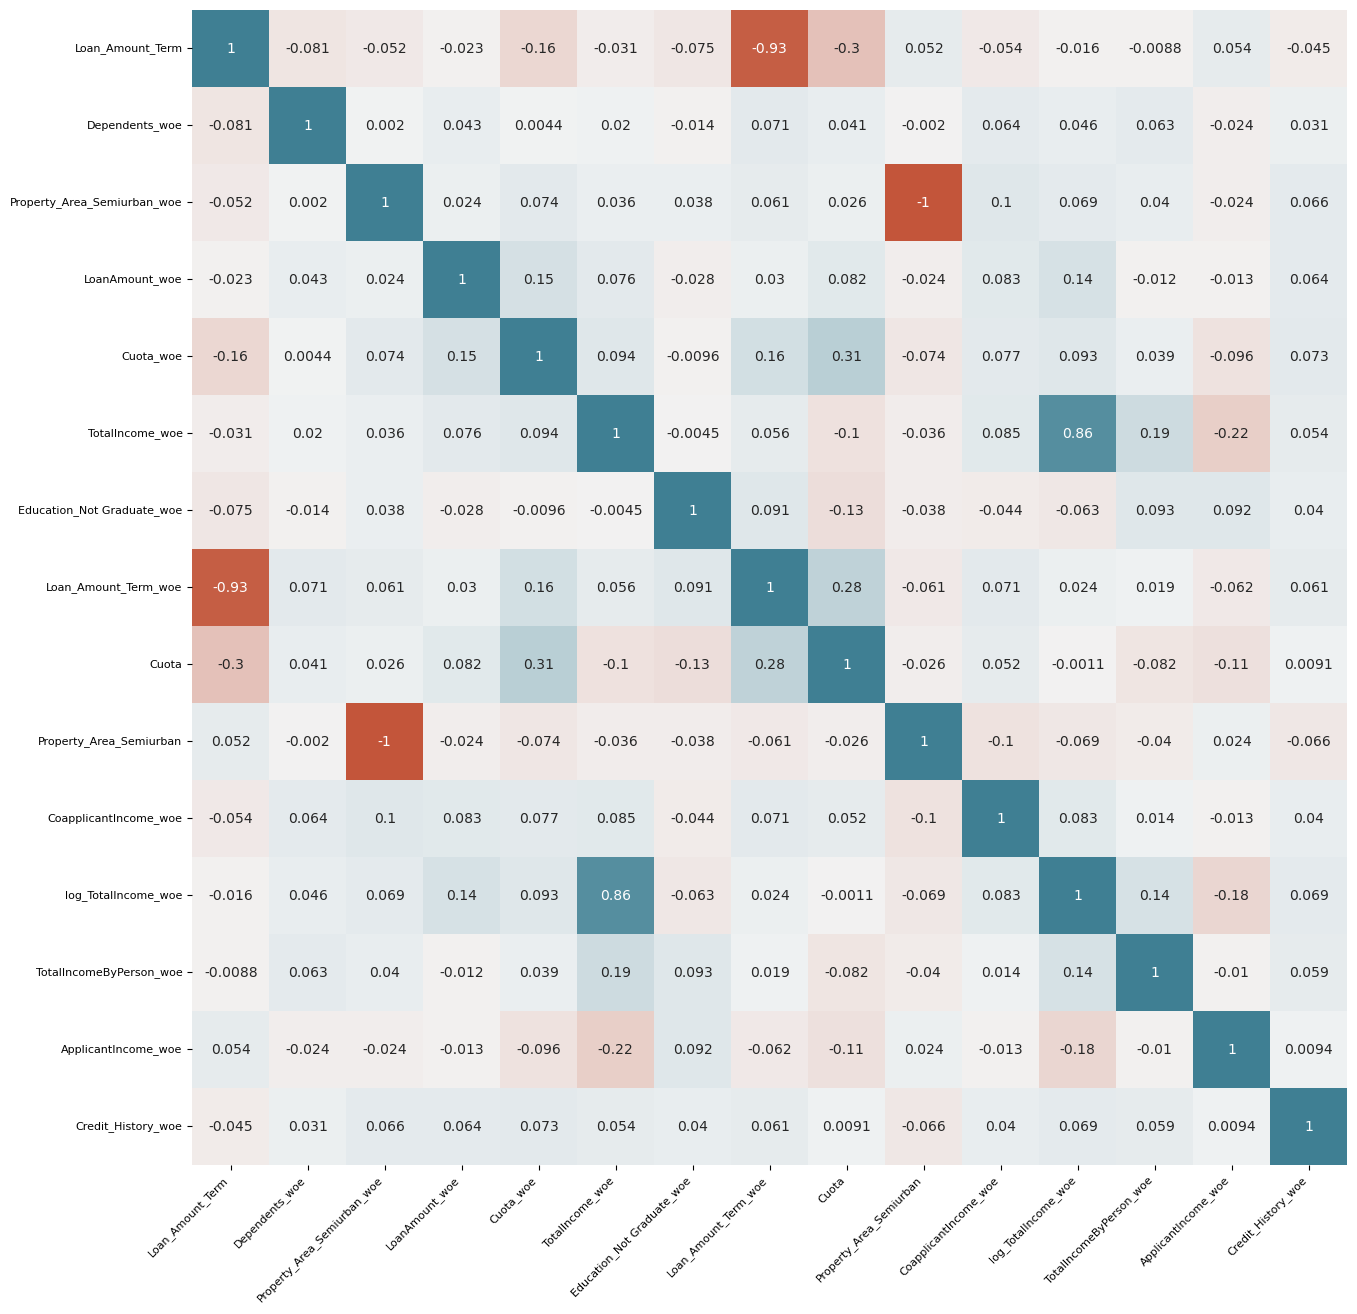

In [596]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      =  1,
    center    =  0,
    cmap      =  sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right', 
)

ax.tick_params(labelsize=8)

In [597]:
# Metodo de Chi - 2 de Independencia!   Recomendado para target binarias y categóricas
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train_total_woe)
chi_selector = SelectKBest(chi2, k=num_feats)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train_total_woe.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features ')

15 selected features 


In [600]:
corr_matrix = X_train_total_woe[chi_feature].corr(method = 'spearman')
tidy_corr_matrix(corr_matrix)#.head(10)

,variable_1,variable_2,r,abs_r
92,Property_Area_Semiurban_woe,Property_Area_Semiurban,-1.000000,1.000000
7,Credit_History,Credit_History_woe,-1.000000,1.000000
25,Education_Not Graduate,Education_Not Graduate_woe,1.000000,1.000000
105,Credit_History_woe,Credit_History,-1.000000,1.000000
151,Education_Not Graduate_woe,Education_Not Graduate,1.000000,1.000000
...,...,...,...,...
59,Property_Area_Urban,Dependents_woe,0.002583,0.002583
216,Dependents_woe,Property_Area_Semiurban_woe,0.002003,0.002003
104,Property_Area_Semiurban_woe,Dependents_woe,0.002003,0.002003
44,Property_Area_Semiurban,Dependents_woe,-0.002003,0.002003


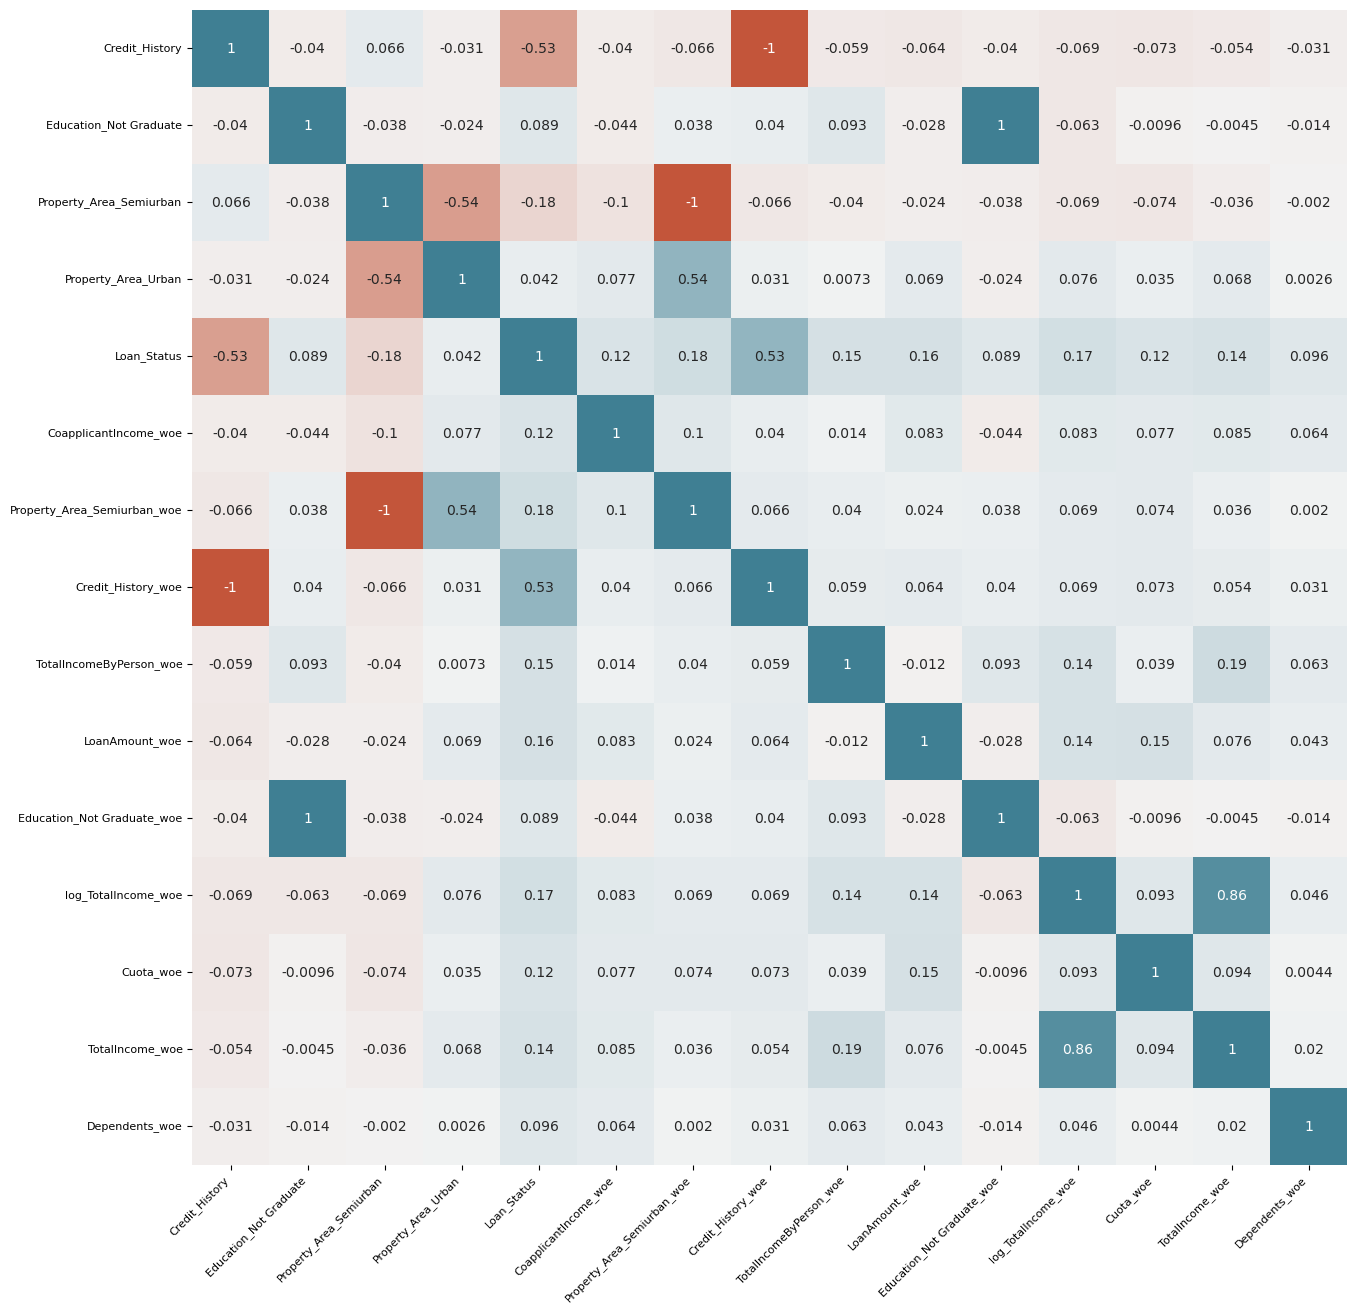

In [601]:
# Heatmap matriz de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 10},
    vmin      = -1,
    vmax      =  1,
    center    =  0,
    cmap      =  sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right', 
)

ax.tick_params(labelsize=8)